In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('7.csv', header=None)

print(data)

          0         1
0     0.763  1.810300
1     0.083  0.032529
2     0.262  0.306770
3     0.120  0.024228
4     0.226  0.143160
...     ...       ...
996   0.672  1.546500
997   0.079  0.041735
998   0.548  1.240400
999   0.065  0.040323
1000  0.737  1.742900

[1001 rows x 2 columns]


### The following graph shows that the data is randomly distributed, hence no random suffling is needed

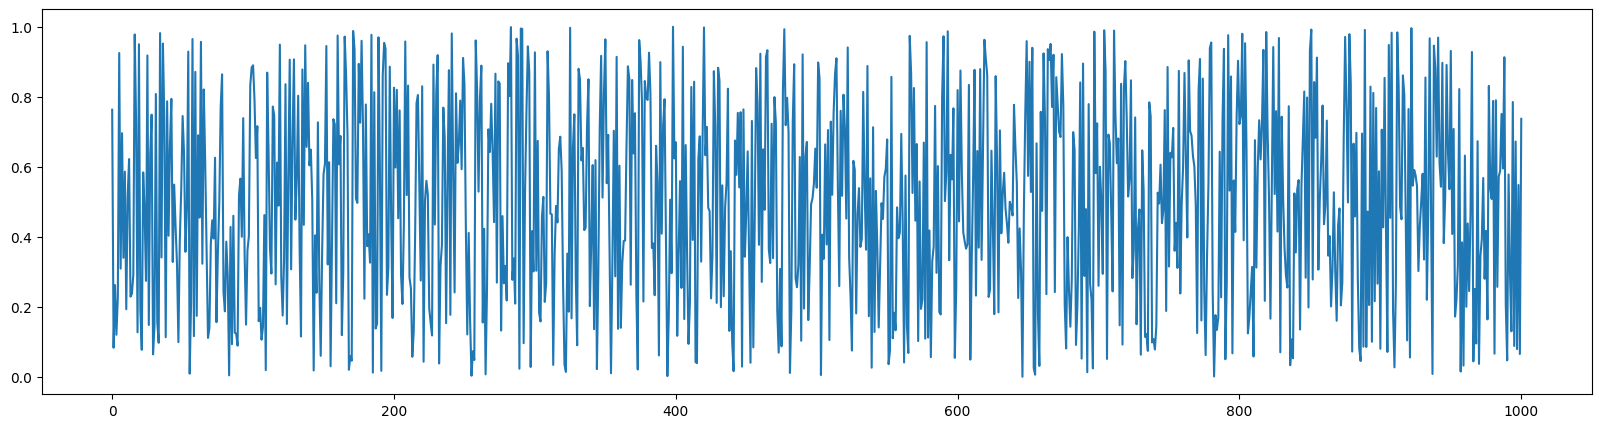

In [4]:
plt.figure(figsize=(20,5))
plt.plot(data[0])

### The follwoing code creates and stores csv files. It needs to be run only once

In [5]:
# train = data[:int(len(data)*0.7)]
# test = data[len(train):]

# train.to_csv("train.csv", index=False, header=None)
# test.to_csv("test.csv", index=False, header=None)

In [6]:
# random_seed = 42 # for reproducibility

# train_sizes = [10, 50, 100]

# for size in train_sizes:
#     sample = train.sample(n=size, random_state=random_seed)
#     sample.to_csv(f'train_{size}.csv', index=False, header=False)

In [7]:
train = pd.read_csv("train.csv", header=None)
test = pd.read_csv("test.csv", header=None)

print(len(train), len(test))

700 301


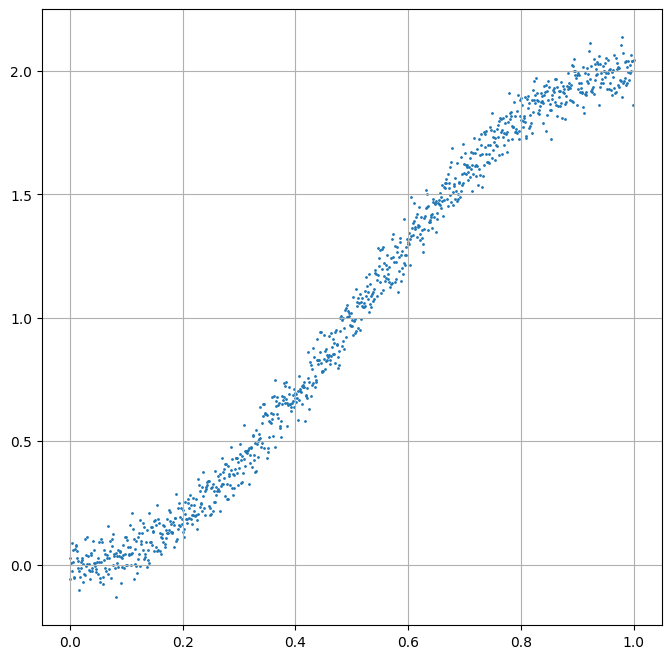

In [8]:
plt.figure(figsize=(8, 8))
plt.grid(True)
plt.scatter(data[0], data[1], s=1)

In [9]:
def calculate_weights(x, y, degree):

    # Construct the design matrix X with polynomial features
    X = np.vander(x, degree + 1, increasing=True)

    # Calculate the weight vector w using the Normal Equation
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    
    return w

def calculate_regularized_weights(x, y, degree, lambda_reg):

    # Create the Vandermonde matrix for polynomial features
    X = np.vander(x, degree + 1, increasing=True)
    
    # Identity matrix for regularization term (match dimensions of X^T * X)
    I = np.eye(X.shape[1])

    # Calculate regularized weights
    w = np.linalg.inv(X.T @ X + lambda_reg * I) @ X.T @ y
    
    return w
    
def f(x, w):

    return np.polyval(w[::-1], x)  # Reverse w for np.polyval (coefficients must be in descending order)

def calculate_mse(y_true, y_pred):

    # Ensure inputs are numpy arrays for element-wise operations
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate MSE
    mse = np.mean((y_true - y_pred) ** 2)
    
    return mse

In [10]:
result = [] # train size, degree, reg_para, w, train_mse, test_mse

In [11]:
def plot_non_regularized(train):
    degrees = [2,3,4,5,6,7,8,9]
    ws = [] # weights for different degrees

    x = train[0]
    y = train[1]
    
    for degree in degrees:
        ws.append(calculate_weights(x, y, degree))
    
    for w in ws:

        print(f"degree: {len(w) - 1}")
        
        # Generate points for plotting
        x_plot = np.linspace(x.min(), x.max(), 100)  # 100 points in the range of x
        y_plot = f(x_plot, w)
        
        sorted_indices = np.argsort(x_plot)
        x_plot = x_plot[sorted_indices]
        y_plot = y_plot[sorted_indices]
        
        # Create scatter plot and polynomial curve
        plt.xlabel('x (independent variable)')
        plt.ylabel('y (dependent variable)')
        plt.scatter(x, y, s=10, label='target')
        plt.plot(x_plot, y_plot, color='red', label='approx. fn.')
        # plt.xlim(-0.05, 1.05)  # Set x-axis limits
        if len(train) == 10 and not len(w) == 10:
            plt.ylim(-.5, 2.5)  # Set y-axis limits
        plt.grid(True)
        plt.legend()
        plt.savefig(f'plots/{len(train)}/0e+00/approx_fn_degree_{len(w)-1}.png', bbox_inches='tight', pad_inches=0)
        plt.show()
        plt.close()

    mse_x = []
    mse_y_train = []
    mse_y_test = []
    
    for w in ws:
        mse_x.append(len(w)-1)
        mse_y_train.append(calculate_mse(y, f(x, w))) # y, approx_y
        mse_y_test.append(calculate_mse(test[1], f(test[0], w)))
        print(f"degree: {len(w)-1}, w: {w}")
        print(f"train mse: {mse_y_train[-1]:.3g}, test mse: {mse_y_test[-1]:.3g}")
        print()
        result.append([len(train), len(w)-1, 0, w, mse_y_train[-1], mse_y_test[-1]])

    plt.xlabel('degree')
    plt.ylabel('mse')
    plt.plot(mse_x, mse_y_train, label='train')
    plt.plot(mse_x, mse_y_test, label='test')
    plt.grid(True)
    plt.legend()
    plt.savefig(f'plots/{len(train)}/0e+00/train_test_mse.png', bbox_inches='tight')
    plt.show()
    plt.close()

    if len(train) == 10 and len(w) == 10:
        plt.yscale('log')
        plt.xlabel('degree')
        plt.ylabel('mse')
        plt.plot(mse_x, mse_y_train, label='train')
        plt.plot(mse_x, mse_y_test, label='test')
        plt.grid(True)
        plt.legend()
        plt.savefig(f'plots/{len(train)}/0e+00/train_test_mse_ylim.png', bbox_inches='tight')
        plt.show()
        plt.close()

degree: 2


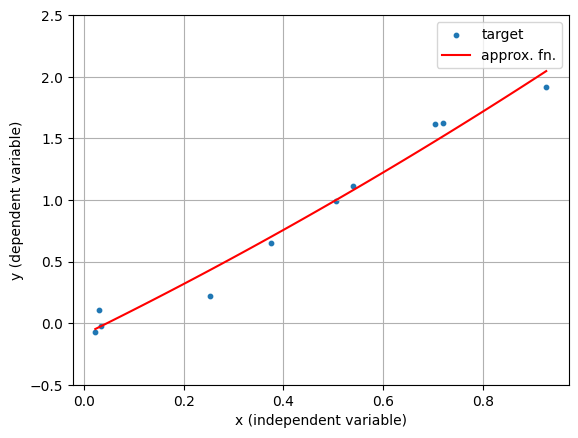

degree: 3


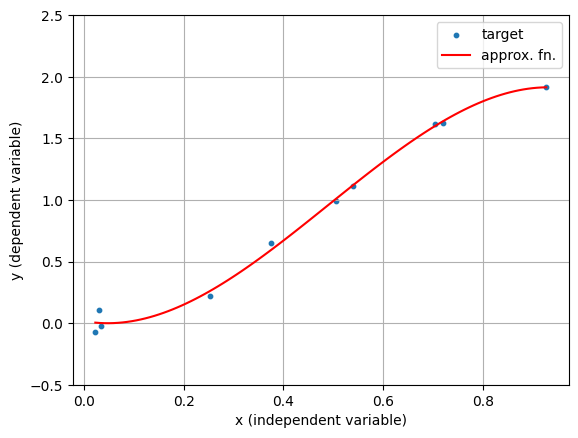

degree: 4


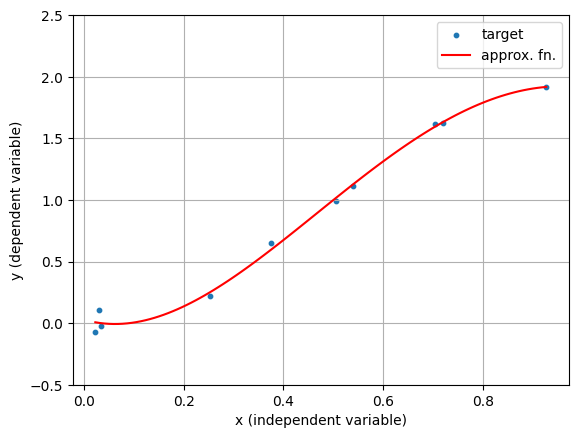

degree: 5


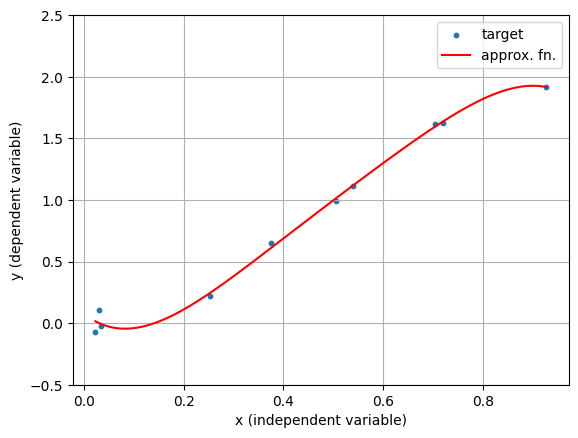

degree: 6


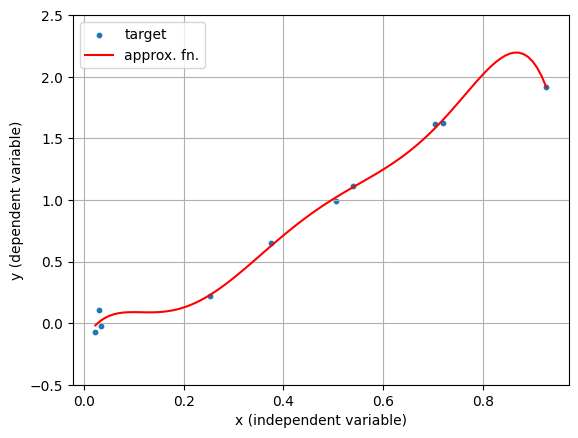

degree: 7


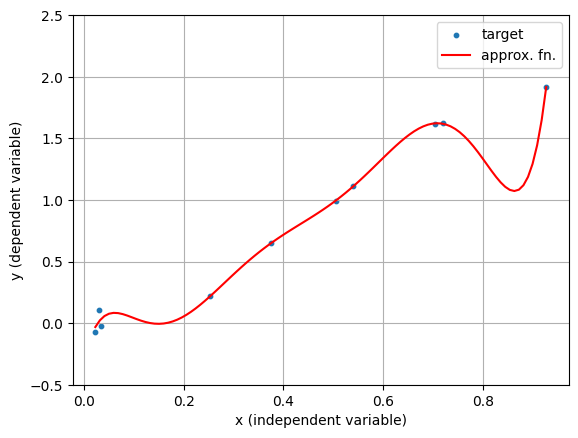

degree: 8


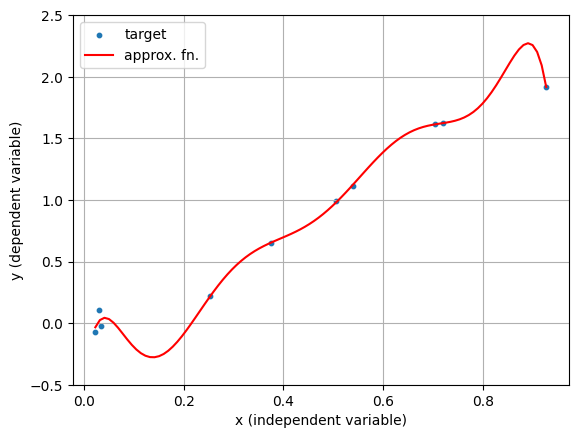

degree: 9


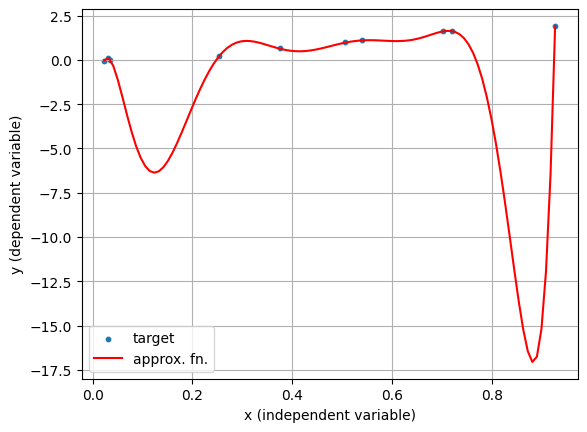

degree: 2, w: [-0.09367607  1.98578128  0.3474906 ]
train mse: 0.0118, test mse: 0.0129

degree: 3, w: [ 0.01696193 -0.74789517  8.17591926 -5.56790107]
train mse: 0.00238, test mse: 0.00412

degree: 4, w: [ 0.02878883 -1.18566933 10.33917923 -9.08296057  1.81223755]
train mse: 0.00235, test mse: 0.00414

degree: 5, w: [  0.07748909  -3.26114029  25.26558372 -49.64666786  48.72142259
 -19.3987039 ]
train mse: 0.0023, test mse: 0.00627

degree: 6, w: [-1.43930025e-01  7.08963558e+00 -7.84959025e+01  3.83516561e+02
 -8.23267480e+02  8.16175810e+02 -3.04668519e+02]
train mse: 0.00197, test mse: 0.0854

degree: 7, w: [-2.91232246e-01  1.59994880e+01 -2.37735096e+02  1.50466176e+03
 -4.63697267e+03  7.51002557e+03 -6.12481871e+03  1.97692947e+03]
train mse: 0.00148, test mse: 0.746

degree: 8, w: [-4.55962078e-01  2.96787144e+01 -5.92017086e+02  4.73024640e+03
 -1.88086217e+04  4.13476503e+04 -5.10939902e+04  3.32340554e+04
 -8.85121318e+03]
train mse: 0.00141, test mse: 0.832

degree: 9, w

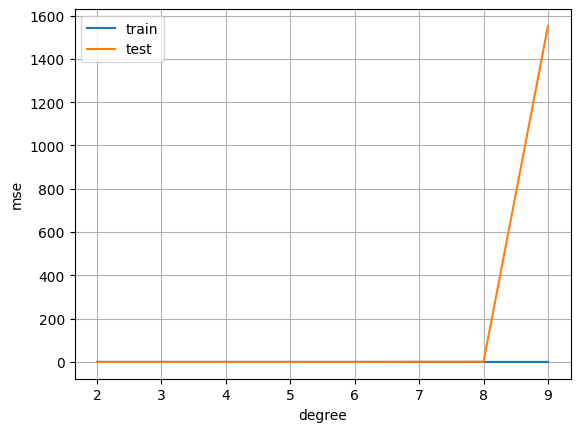

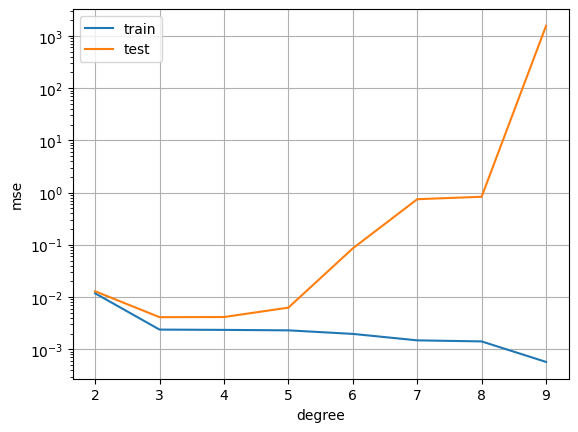

In [12]:
train_10 = pd.read_csv("train_10.csv", header=None)

plot_non_regularized(train_10)

The above data shows that over-fitting occurs from daegree 4 onwards.

In [11]:
def plot_regularized(train, degrees):
    
    reg_paras = [1.0e-07, 1.0e-06, 1.0e-05, 1.0e-04, 1.0e-03, 1.0e-02, 1.0e-01, 1.0e+00]

    for para in reg_paras:

        print(f"parameter: {para}")
        
        ws = [] # weights for different degrees
    
        x = train[0]
        y = train[1]
        
        for degree in degrees:
            ws.append(calculate_regularized_weights(x, y, degree, para))
        
        for w in ws:
    
            # print(f"degree: {len(w) - 1}")
            
            # Generate points for plotting
            x_plot = np.linspace(x.min(), x.max(), 100)  # 100 points in the range of x
            y_plot = f(x_plot, w)
            
            sorted_indices = np.argsort(x_plot)
            x_plot = x_plot[sorted_indices]
            y_plot = y_plot[sorted_indices]
            
            plt.xlabel('x (independent variable)')
            plt.ylabel('y (dependent variable)')
            plt.scatter(x, y, s=10, label='target')
            plt.plot(x_plot, y_plot, color='red', label='approx. fn.')
            # plt.xlim(-0.05, 1.05)  # Set x-axis limits
            # plt.ylim(-0.5, 2.5)  # Set y-axis limits
            plt.grid(True)
            plt.legend()
            plt.savefig(f'plots/{len(train)}/{para:.0e}/approx_fn_degree_{len(w)-1}.png', bbox_inches='tight', pad_inches=0)
            plt.show()
            plt.close()
    
        mse_x = []
        mse_y_train = []
        mse_y_test = []

        ws = []
        all_degrees = [2,3,4,5,6,7,8,9]
        for degree in all_degrees:
            if degree not in degrees:
                ws.append(calculate_weights(x, y, degree))
            else:
                ws.append(calculate_regularized_weights(x, y, degree, para))
        
        for w in ws:
            mse_x.append(len(w)-1)
            mse_y_train.append(calculate_mse(y, f(x, w))) # y, approx_y
            mse_y_test.append(calculate_mse(test[1], f(test[0], w)))
            result.append([len(train), len(w)-1, para, w, mse_y_train[-1], mse_y_test[-1]])

        plt.xlabel('degree')
        plt.ylabel('mse')
        # plt.ylim(0, 0.02)  # Set y-axis limits
        plt.plot(mse_x, mse_y_train, label='train')
        plt.plot(mse_x, mse_y_test, label='test')
        plt.grid(True)
        plt.legend()
        plt.savefig(f'plots/{len(train)}/{para:.0e}/train_test_mse.png', bbox_inches='tight', pad_inches=0)
        plt.show()
        plt.close()

parameter: 1e-07


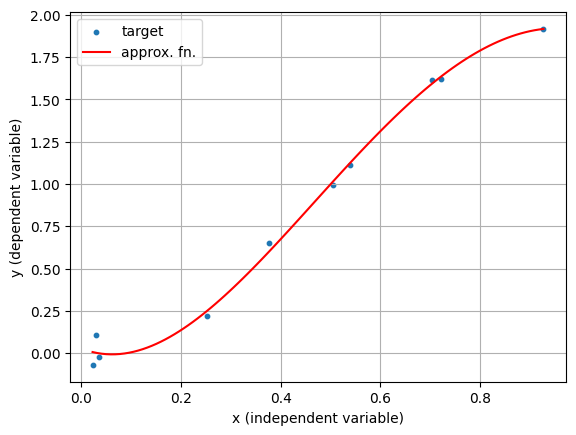

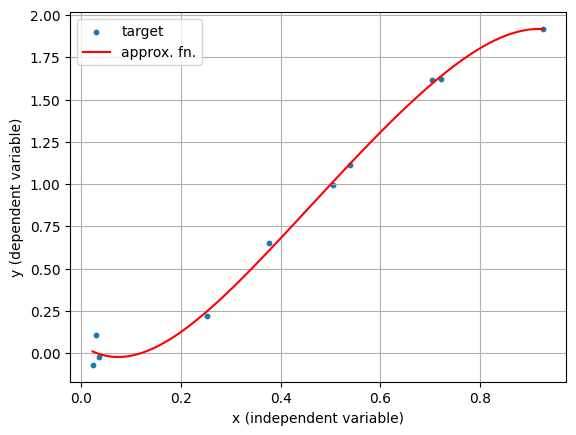

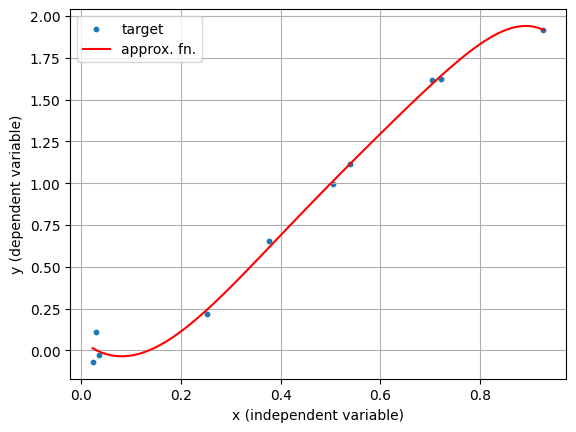

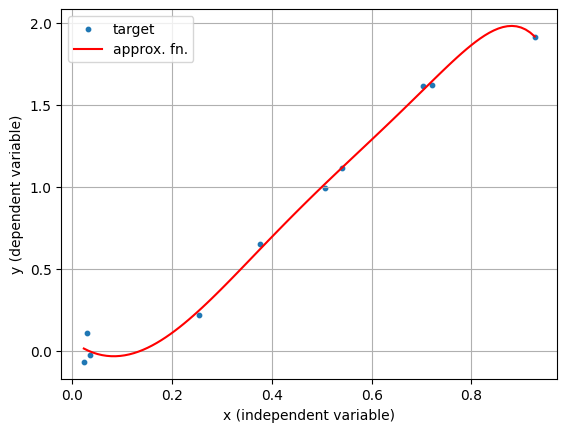

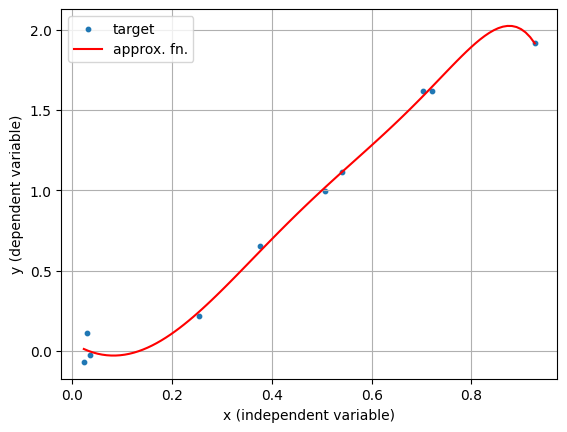

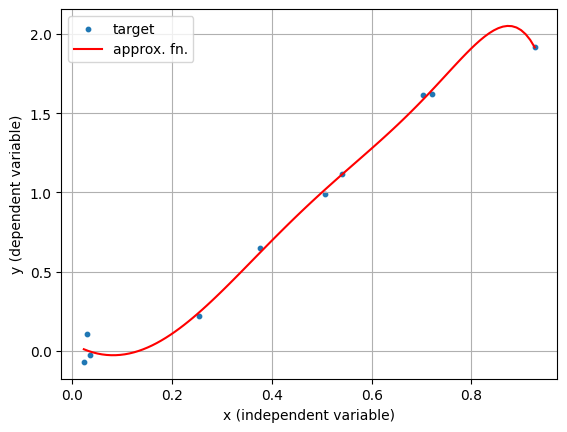

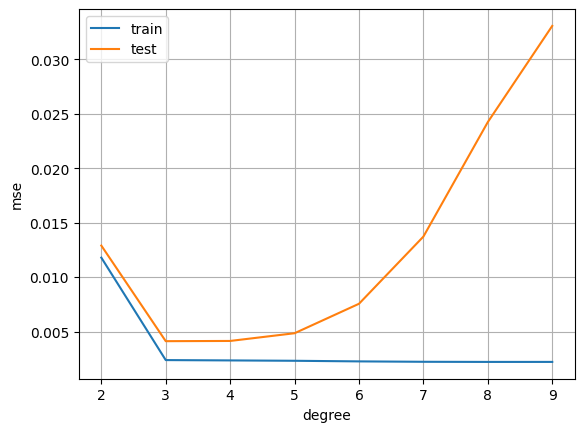

parameter: 1e-06


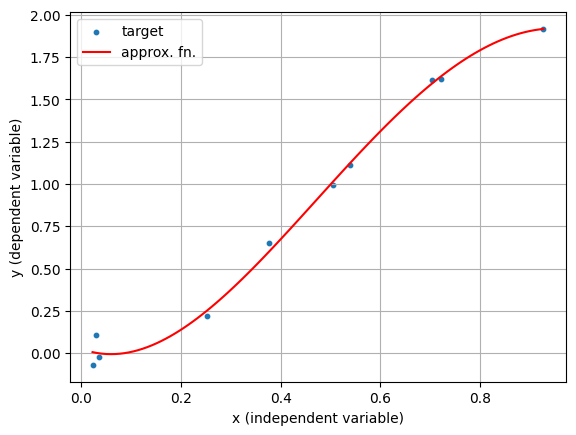

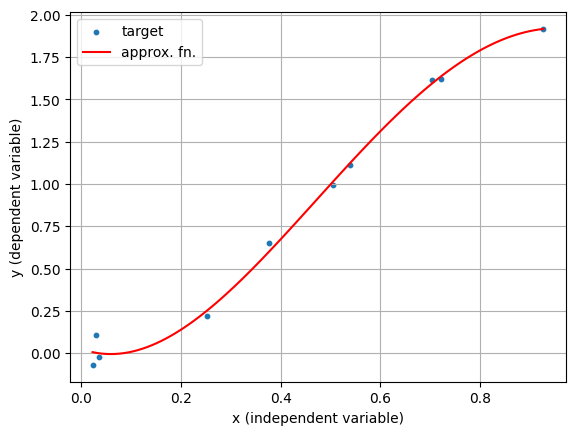

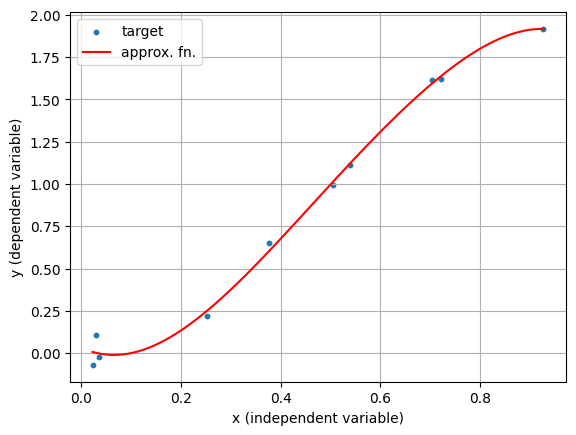

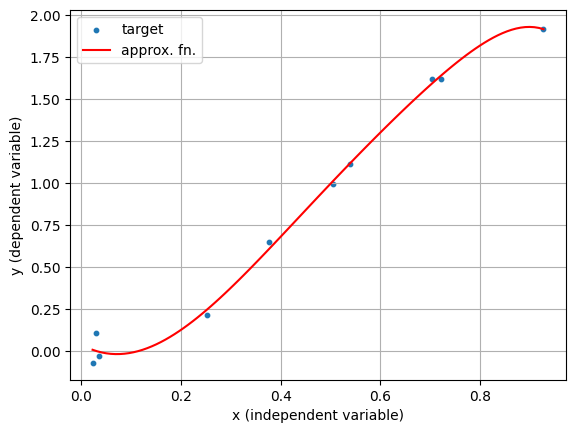

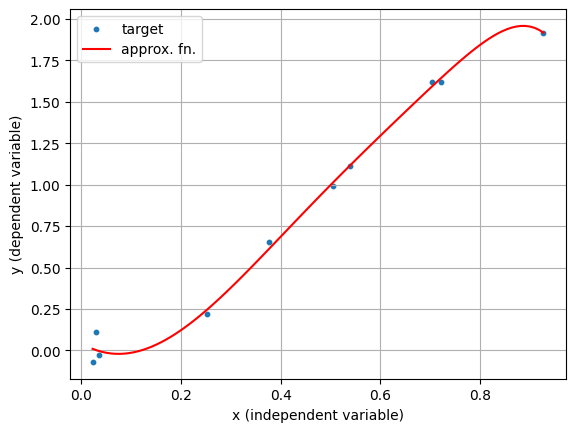

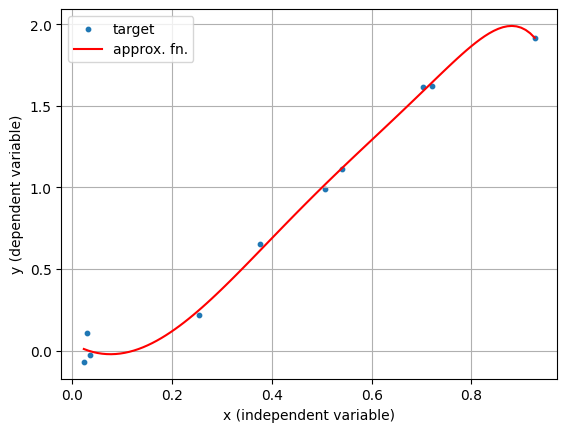

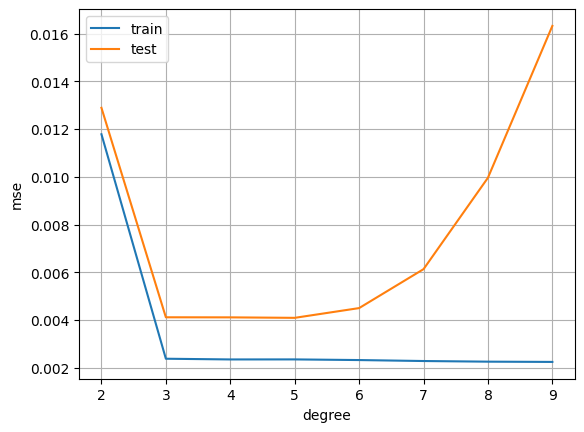

parameter: 1e-05


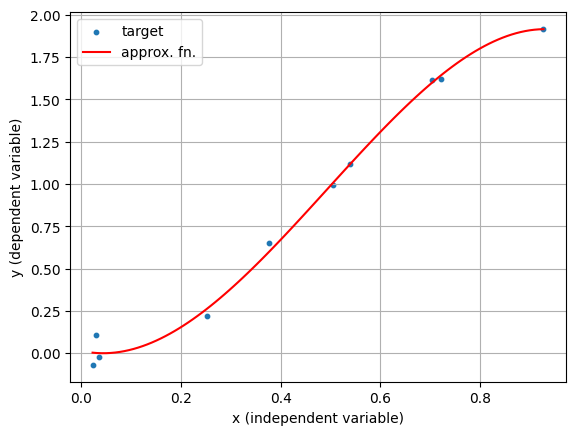

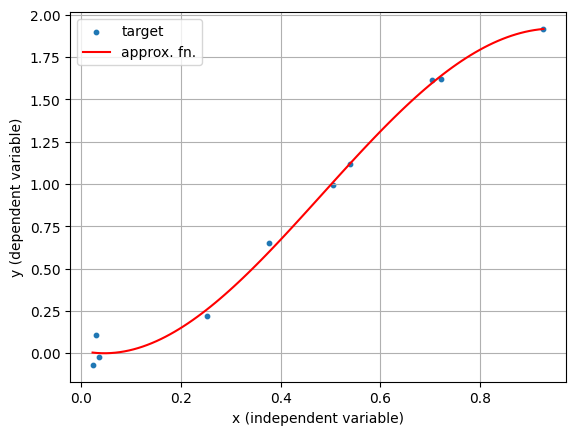

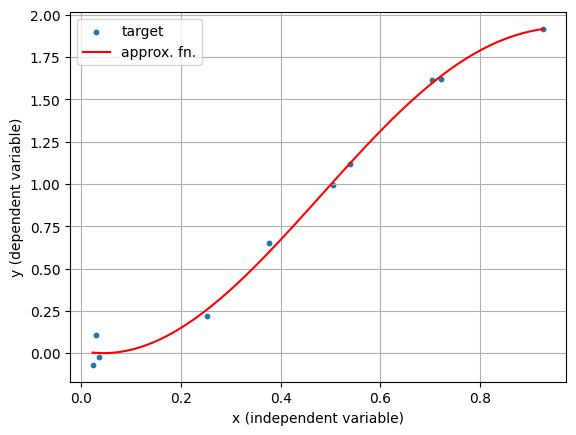

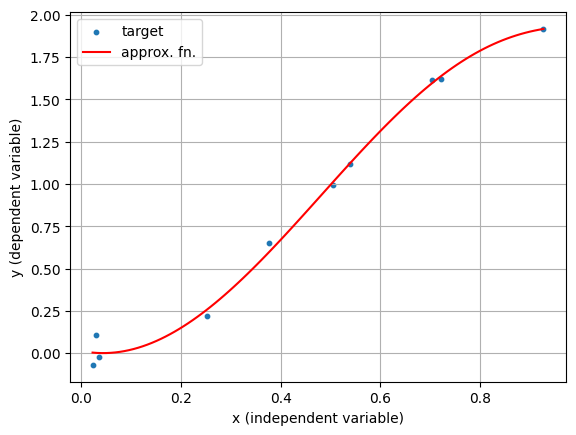

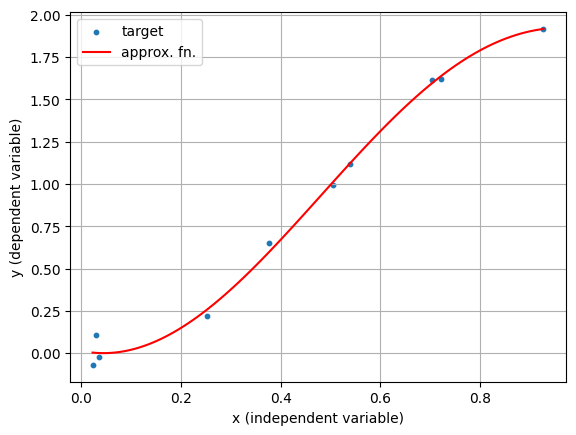

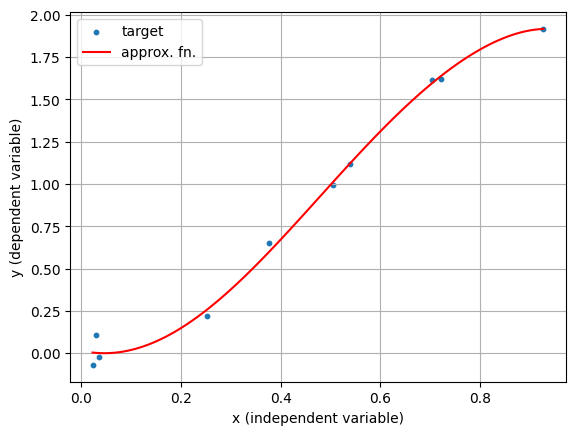

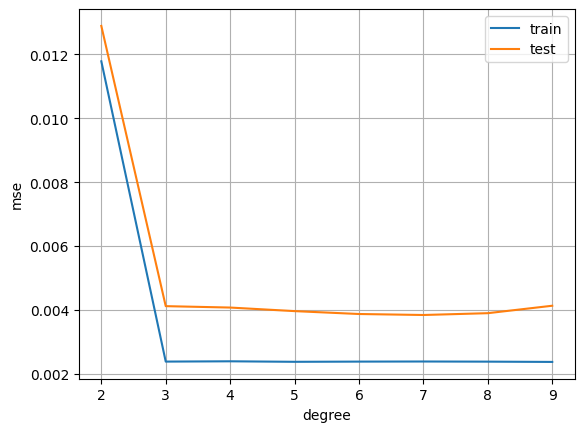

parameter: 0.0001


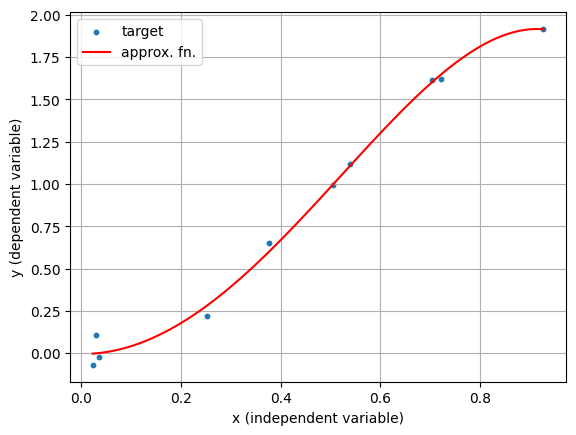

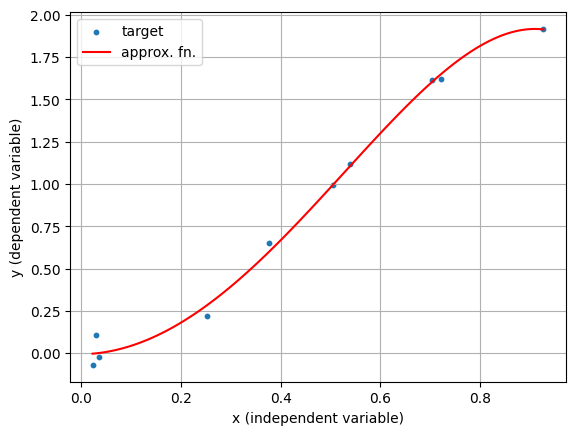

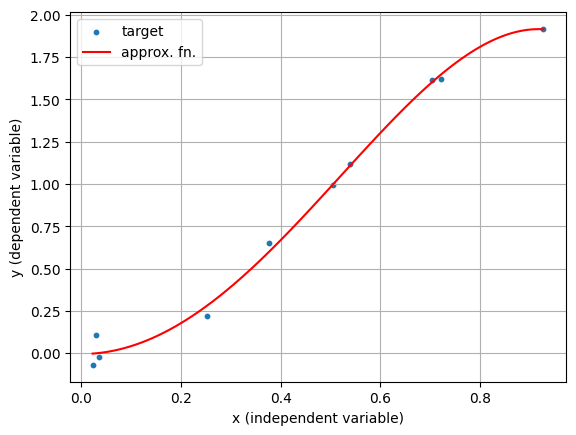

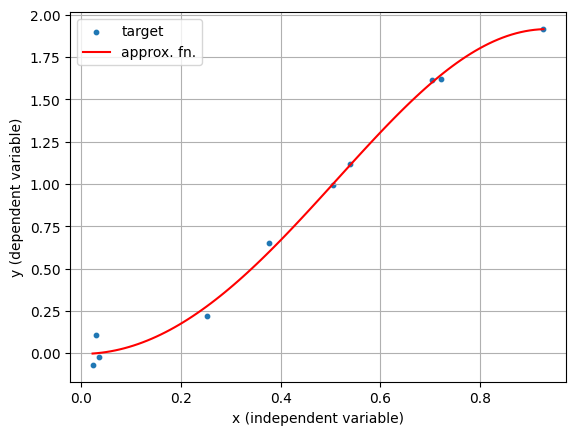

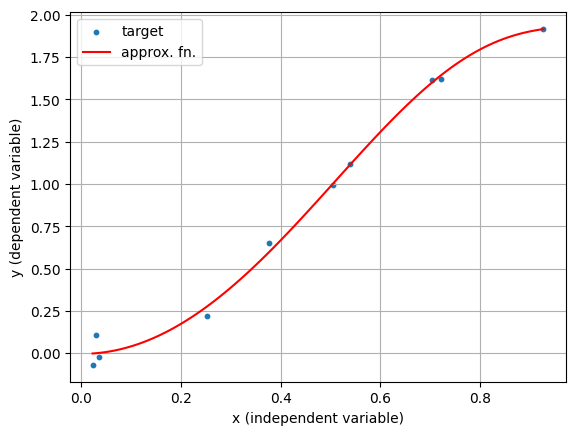

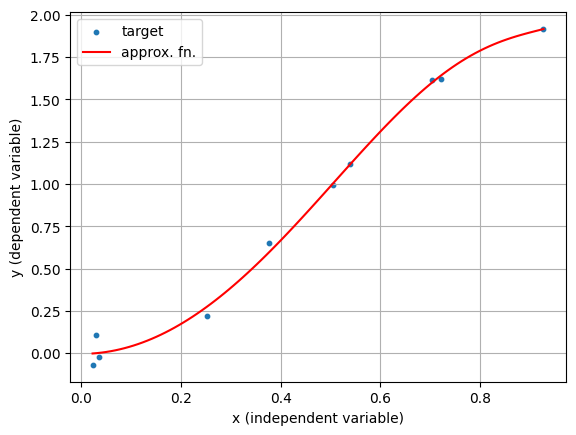

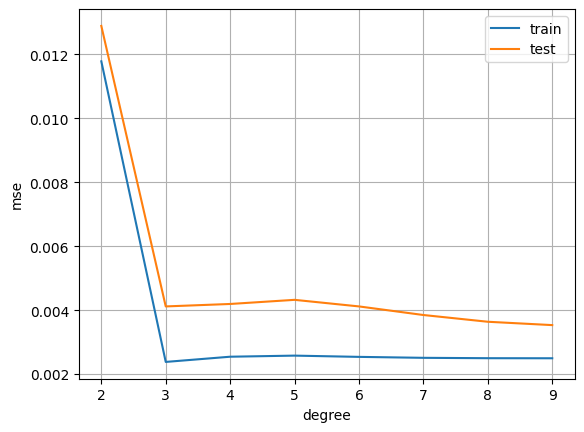

parameter: 0.001


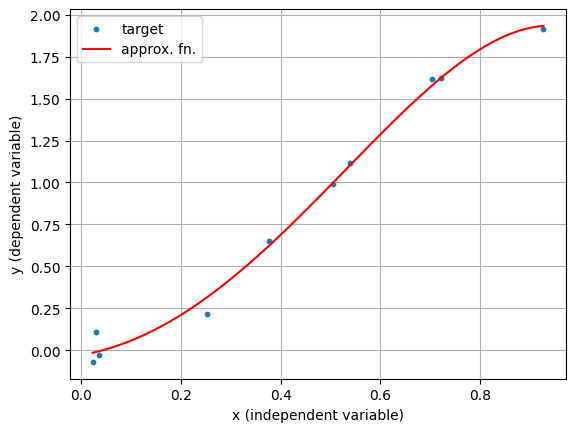

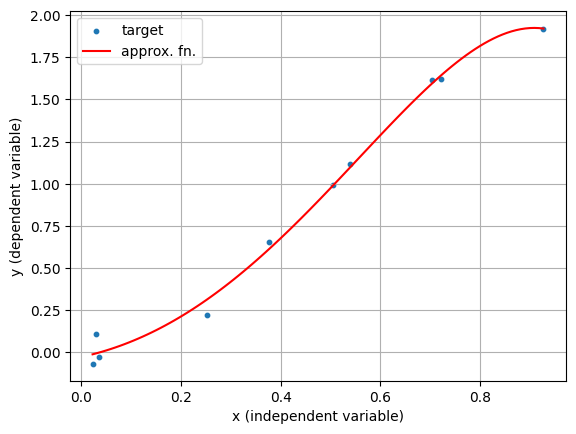

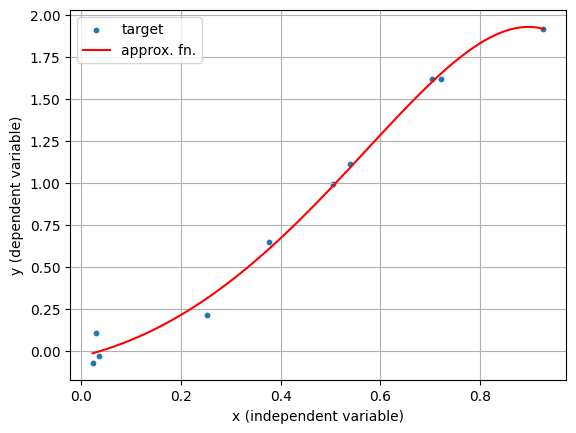

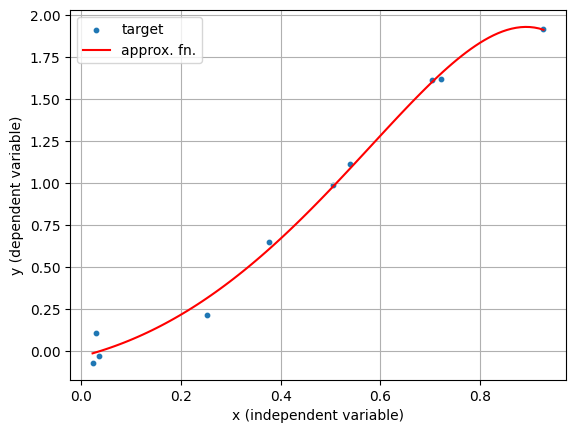

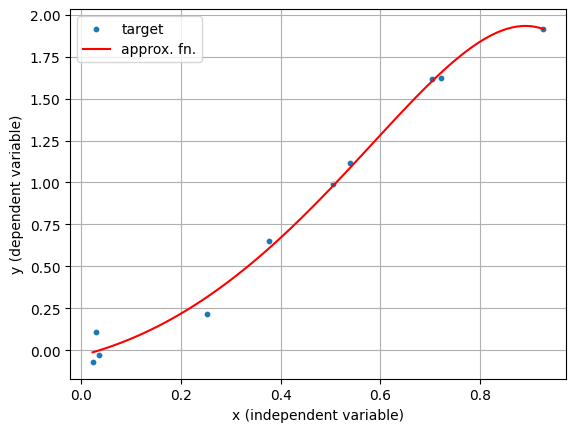

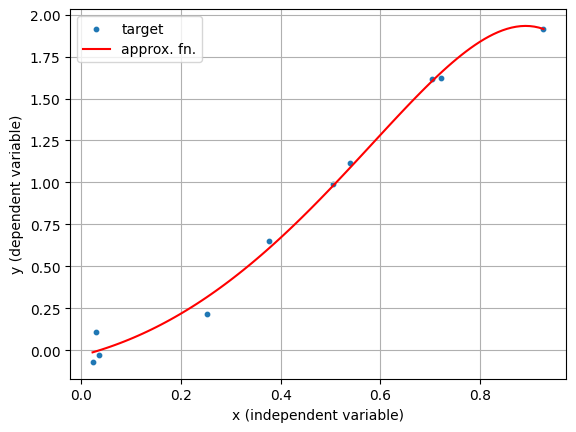

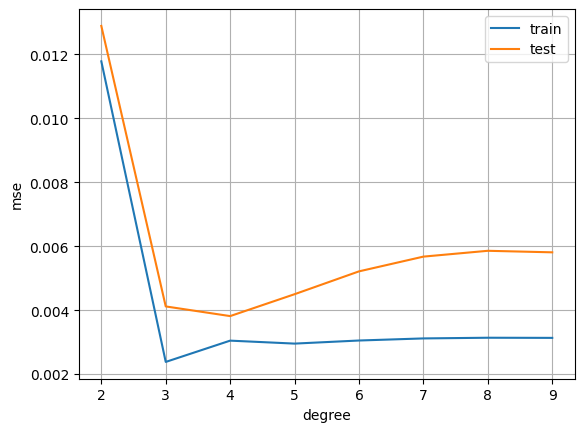

parameter: 0.01


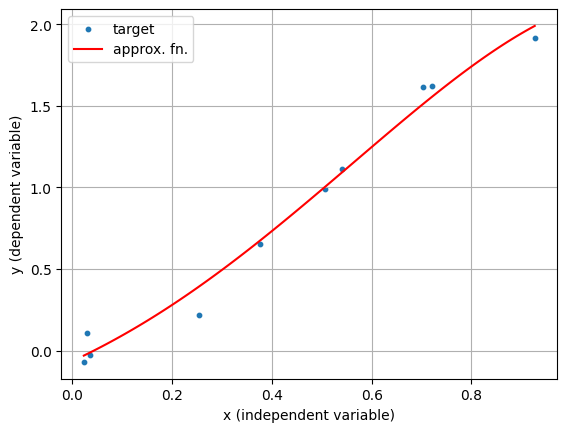

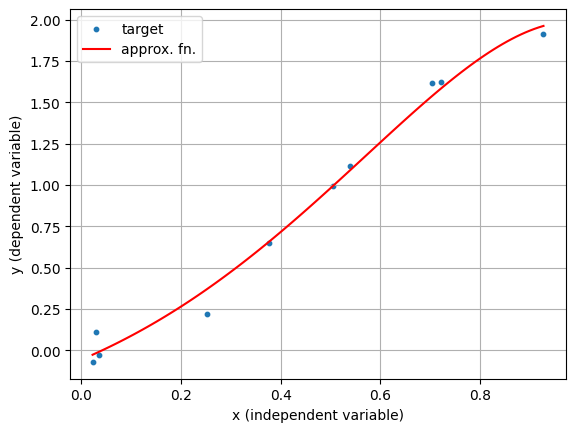

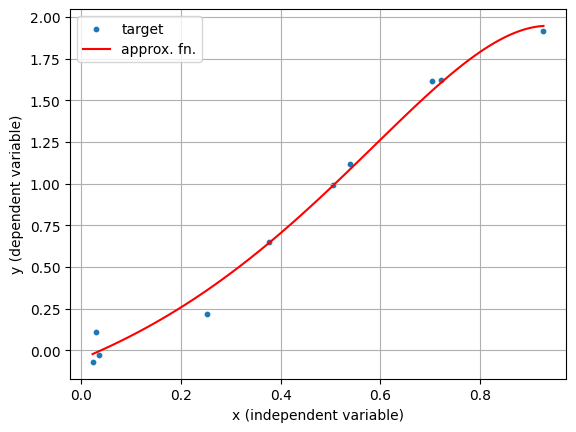

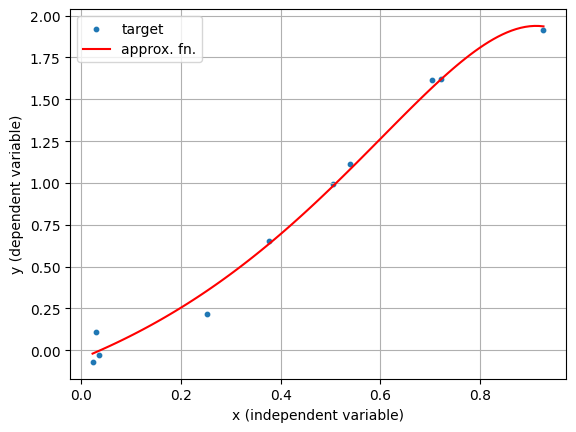

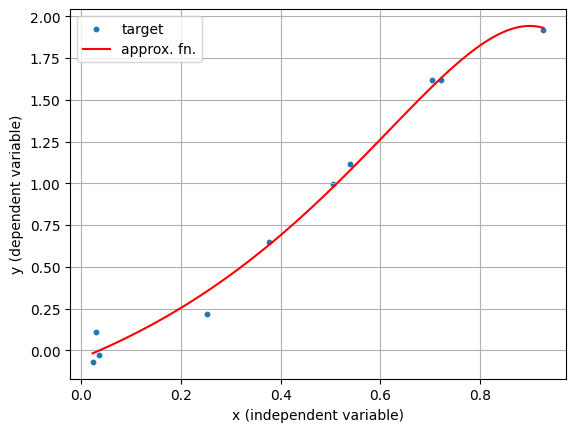

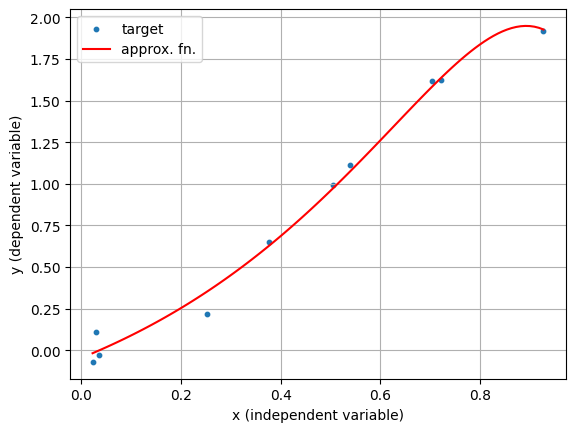

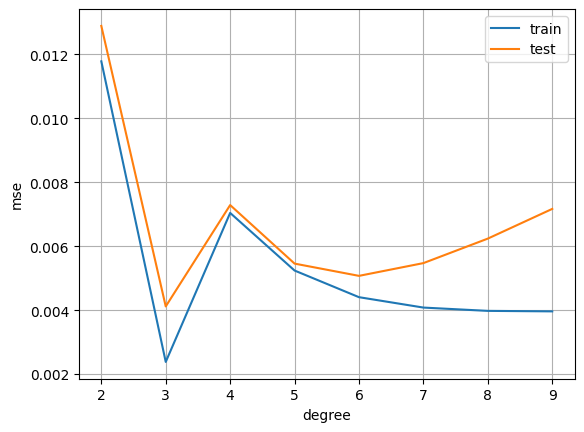

parameter: 0.1


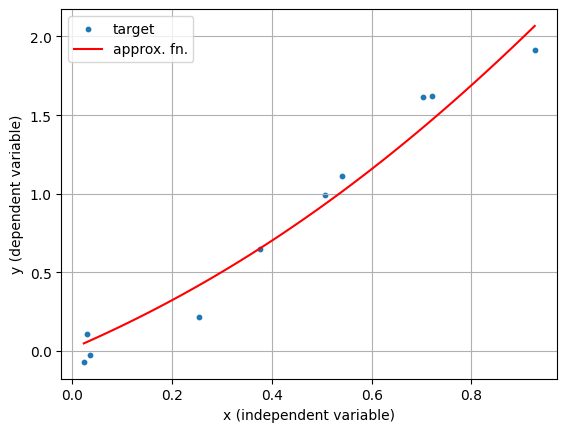

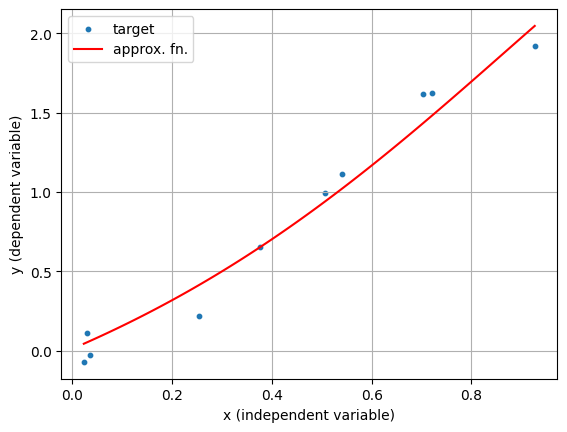

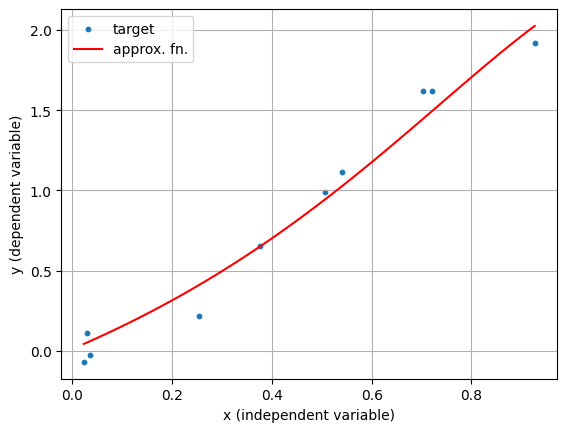

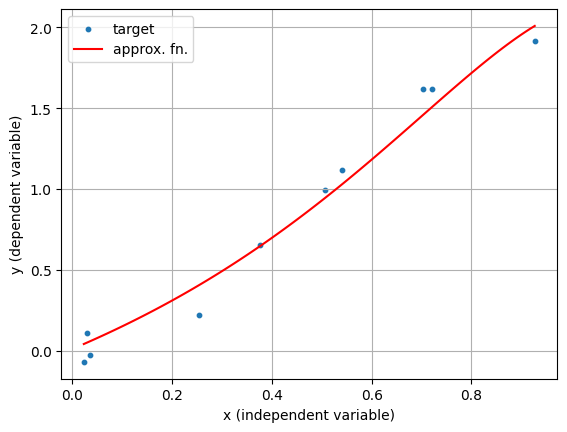

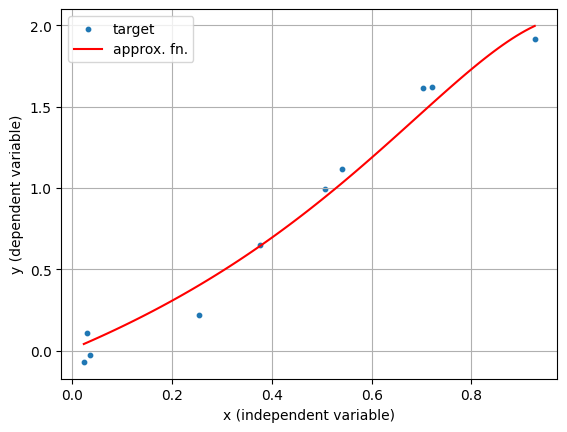

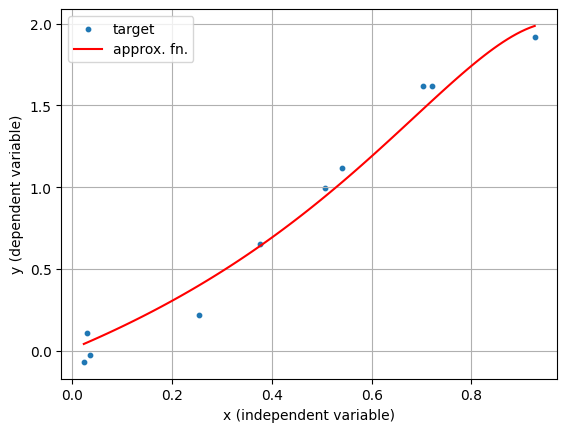

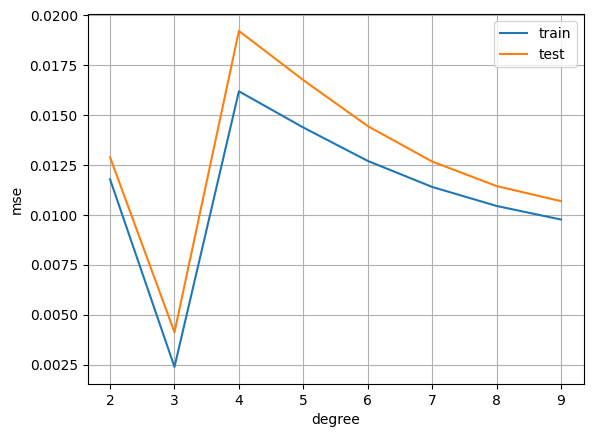

parameter: 1.0


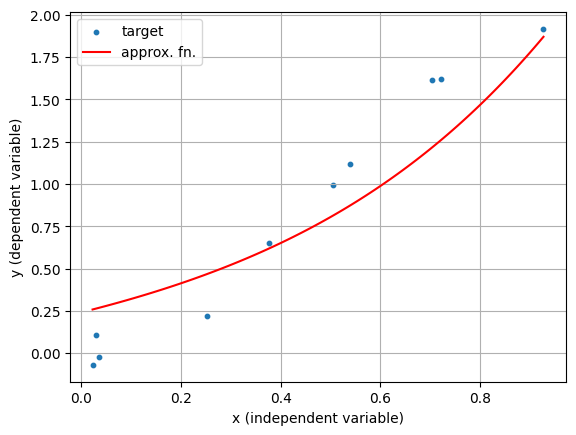

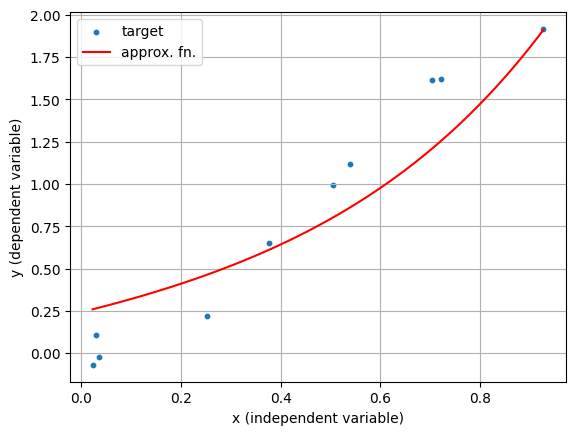

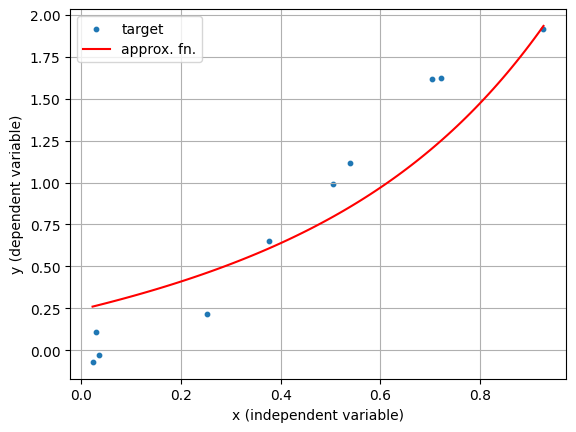

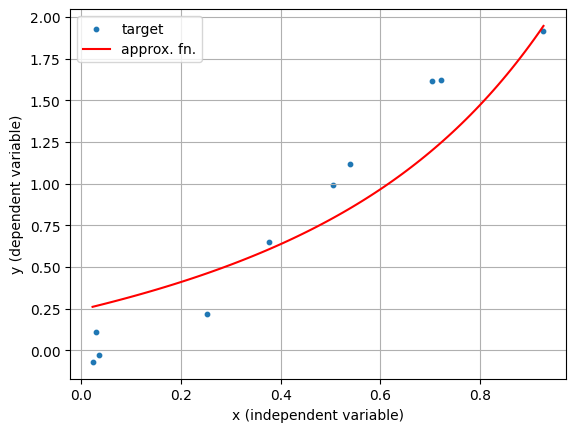

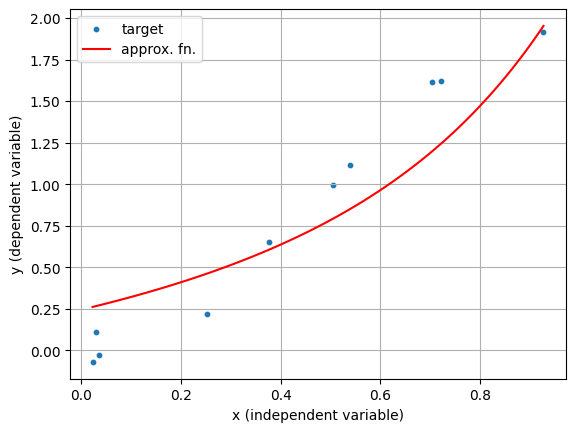

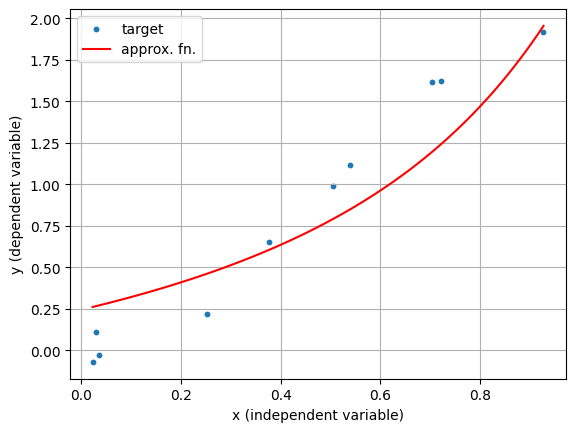

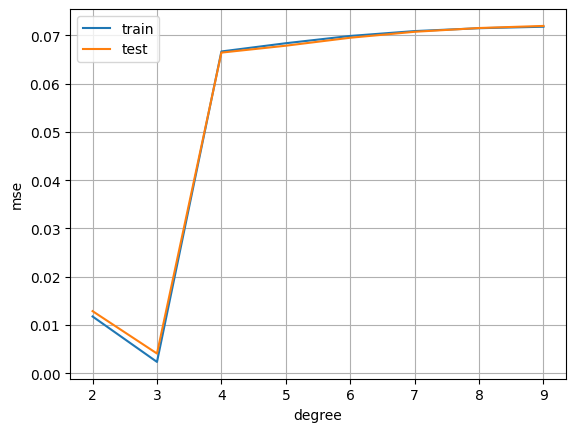

In [12]:
plot_regularized(train_10, [4,5,6,7,8,9])

degree: 2


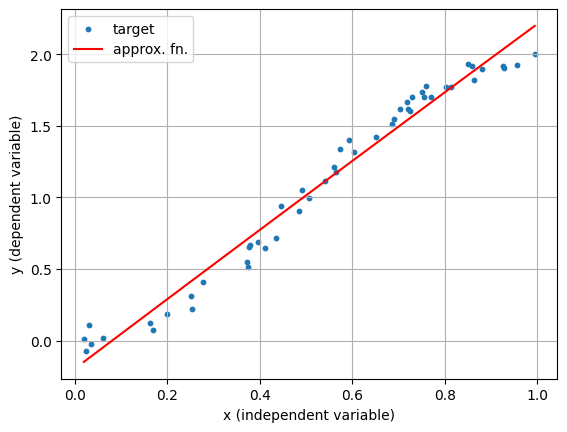

degree: 3


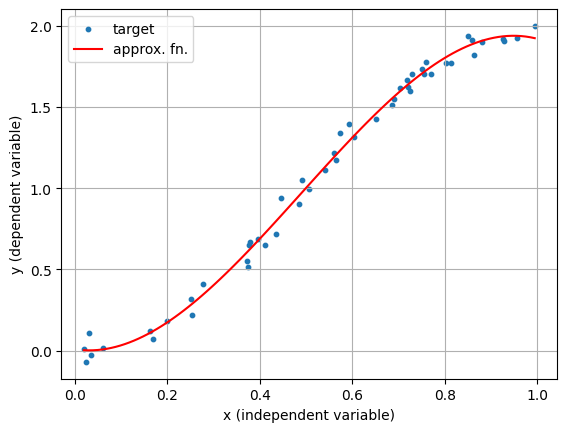

degree: 4


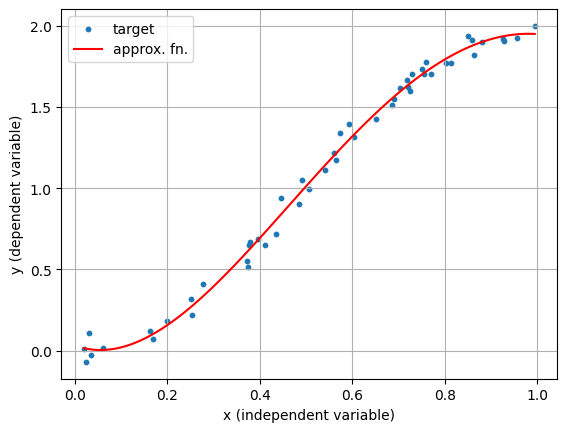

degree: 5


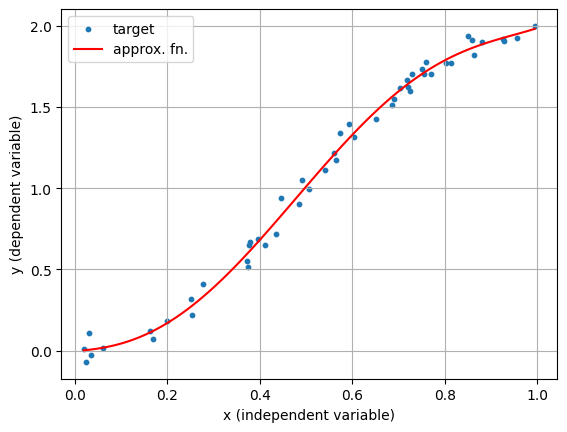

degree: 6


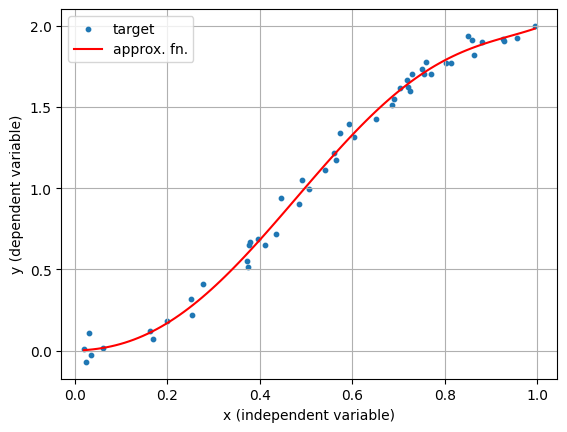

degree: 7


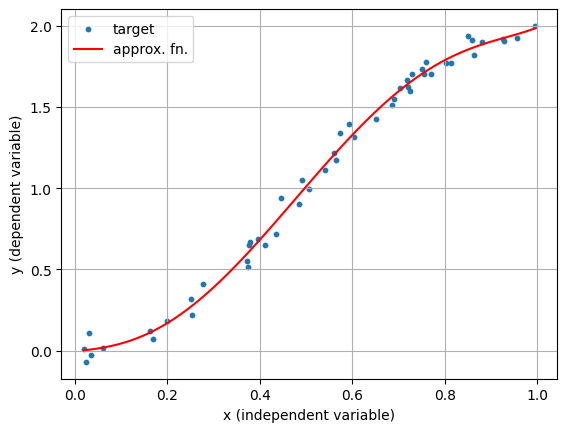

degree: 8


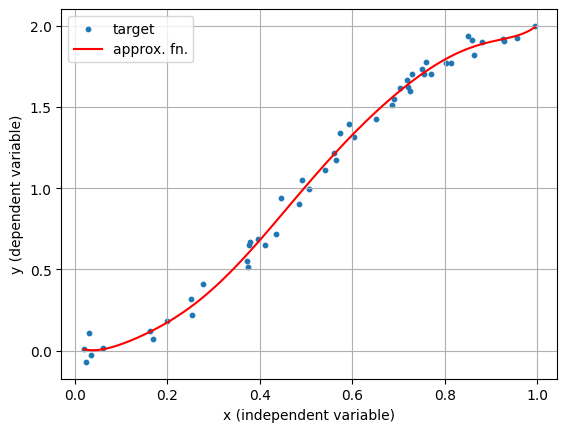

degree: 9


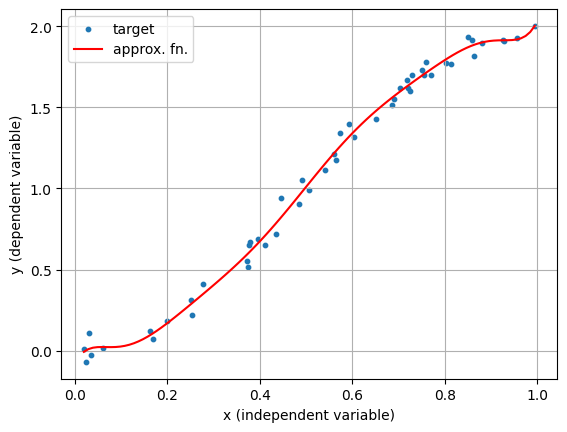

degree: 2, w: [-0.19464249  2.43234567 -0.02805802]
train mse: 0.0119, test mse: 0.0108

degree: 3, w: [ 0.00845794 -0.43750017  7.3486856  -4.99879685]
train mse: 0.00276, test mse: 0.00343

degree: 4, w: [ 0.03117229 -1.01830595  9.98937984 -9.06380163  2.01126799]
train mse: 0.00268, test mse: 0.00351

degree: 5, w: [-2.33850992e-03  2.02152717e-01  1.52228540e+00  1.30689208e+01
 -2.24810642e+01  9.67618298e+00]
train mse: 0.00257, test mse: 0.00346

degree: 6, w: [ 3.90624890e-04  8.20194550e-02  2.63937218e+00  8.88931911e+00
 -1.50534579e+01  3.41066757e+00  2.01947707e+00]
train mse: 0.00257, test mse: 0.00346

degree: 7, w: [-4.44329712e-03  3.21726911e-01 -1.96248789e-01  2.31803240e+01
 -5.16395666e+01  5.33199659e+01 -3.25370284e+01  9.54480833e+00]
train mse: 0.00257, test mse: 0.00345

degree: 8, w: [ 3.04299444e-02 -1.65295167e+00  3.03101992e+01 -1.84421518e+02
  6.89069418e+02 -1.43367347e+03  1.65694678e+03 -1.00383400e+03
  2.49227066e+02]
train mse: 0.00255, test ms

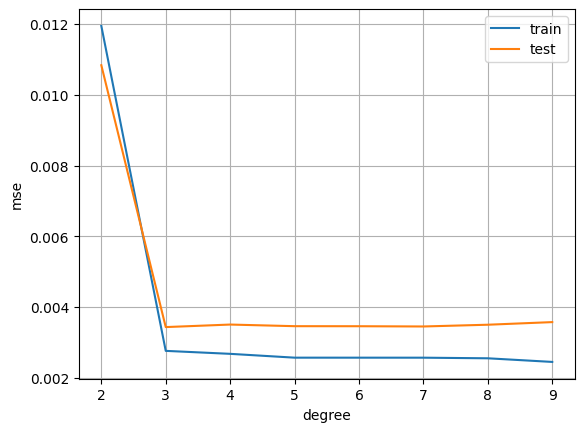

In [13]:
train_50 = pd.read_csv("train_50.csv", header=None)

plot_non_regularized(train_50)

parameter: 1e-07


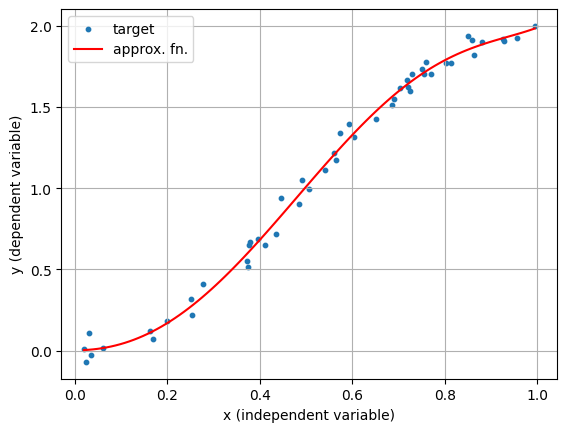

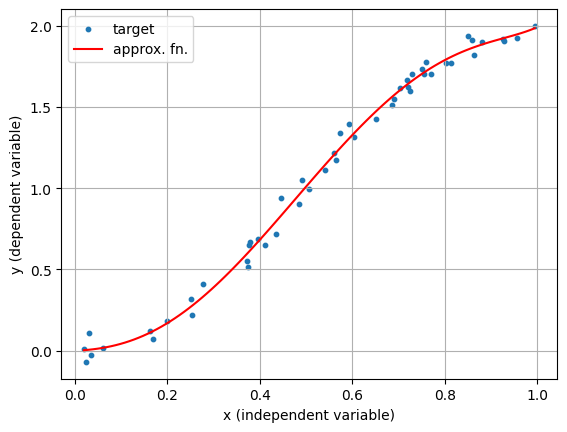

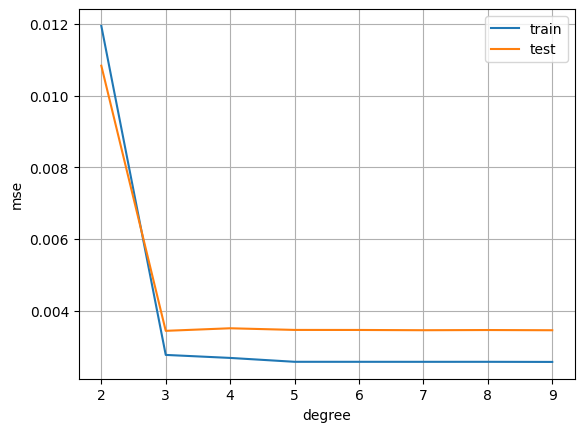

parameter: 1e-06


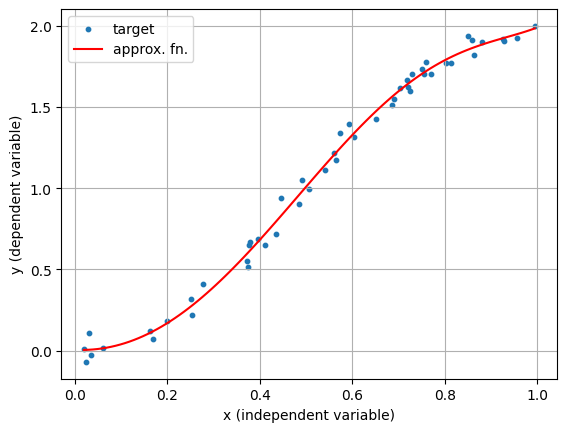

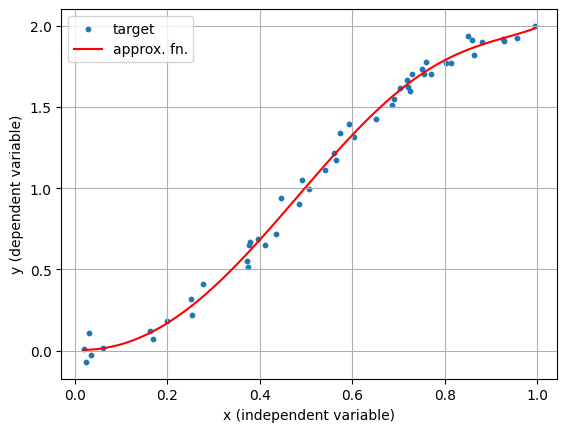

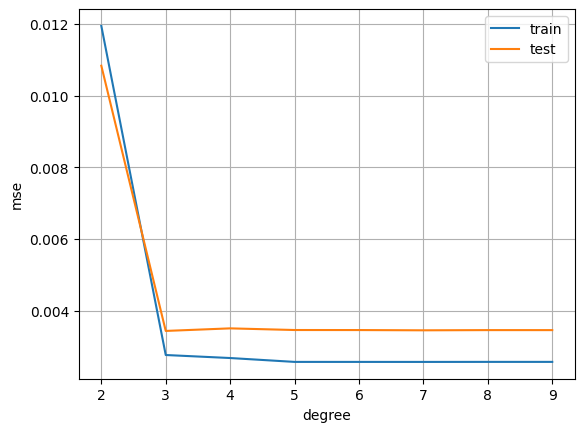

parameter: 1e-05


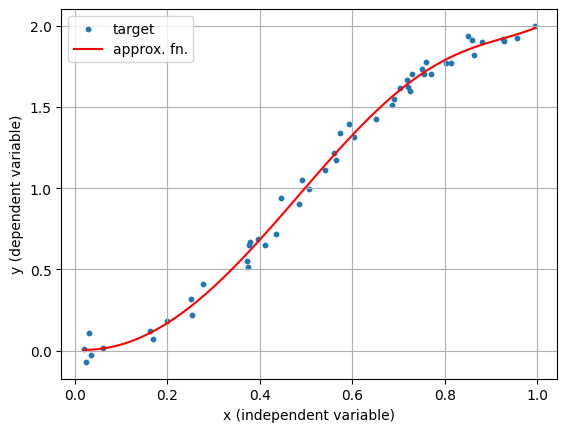

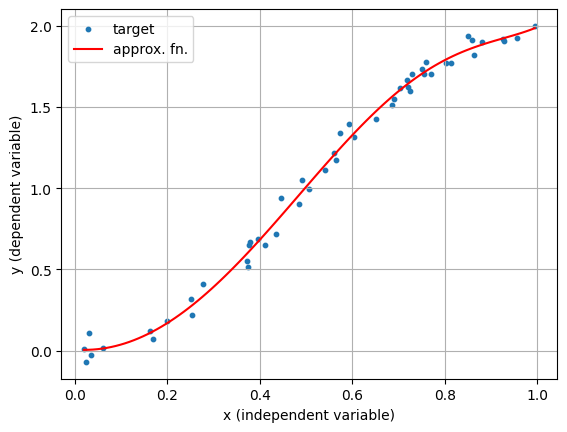

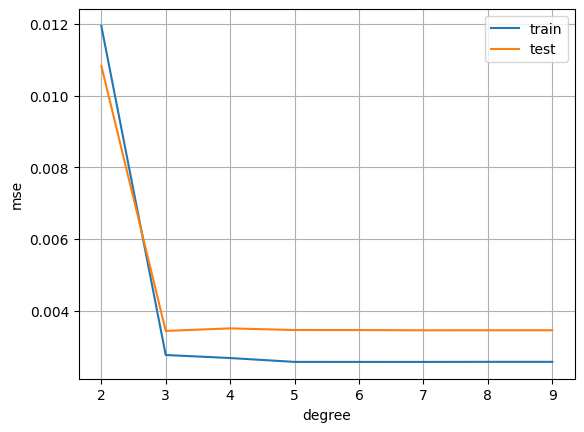

parameter: 0.0001


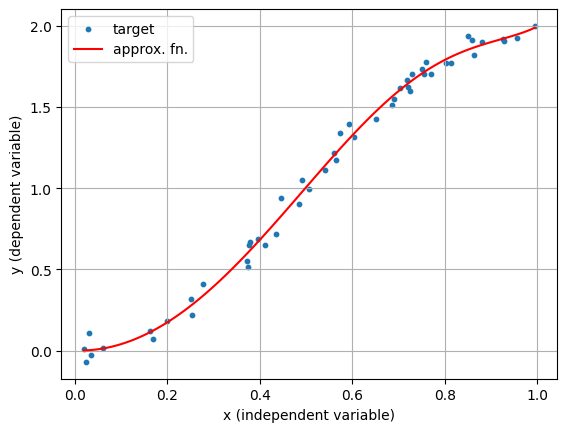

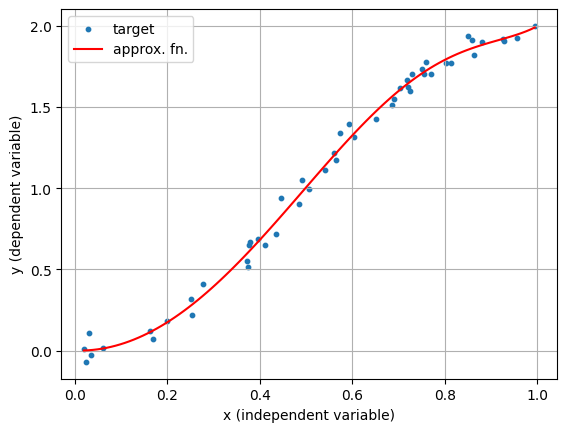

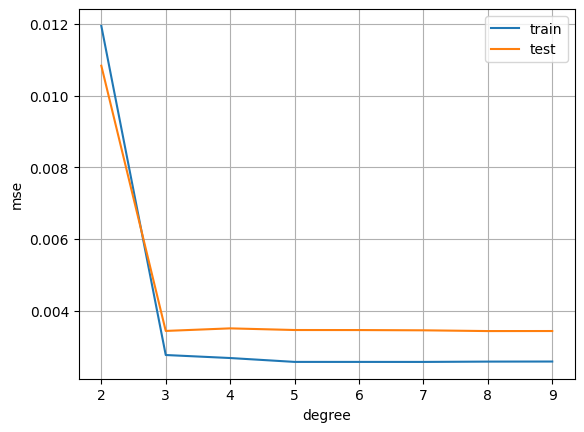

parameter: 0.001


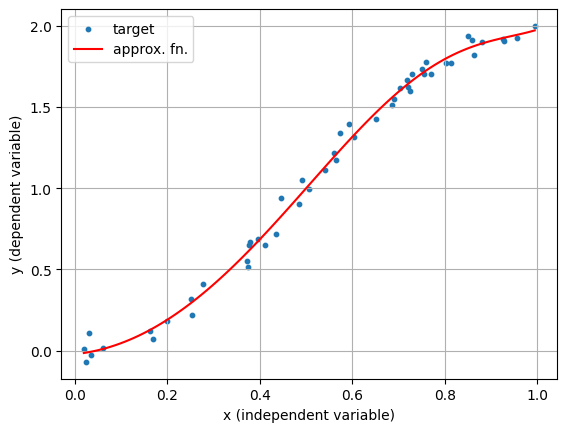

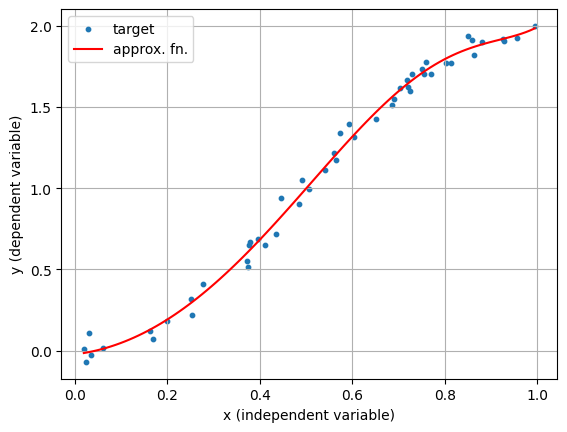

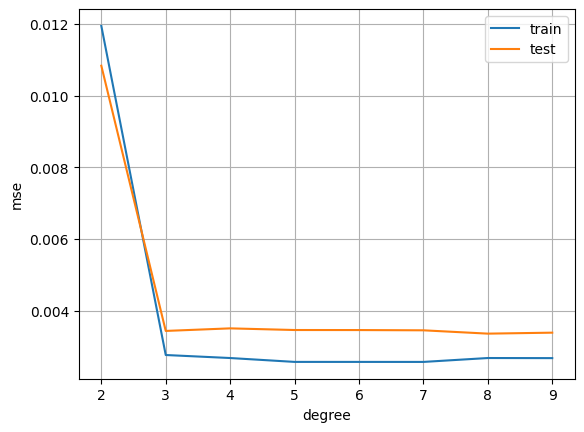

parameter: 0.01


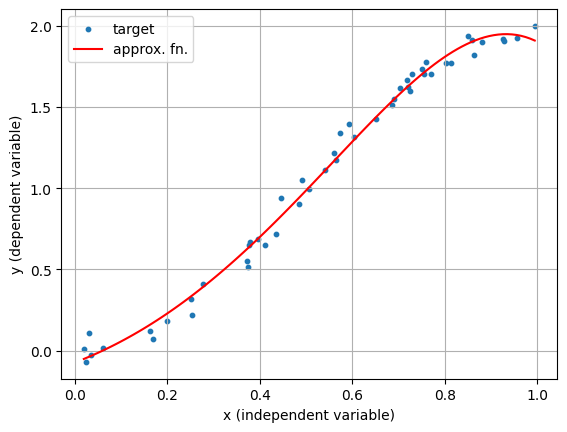

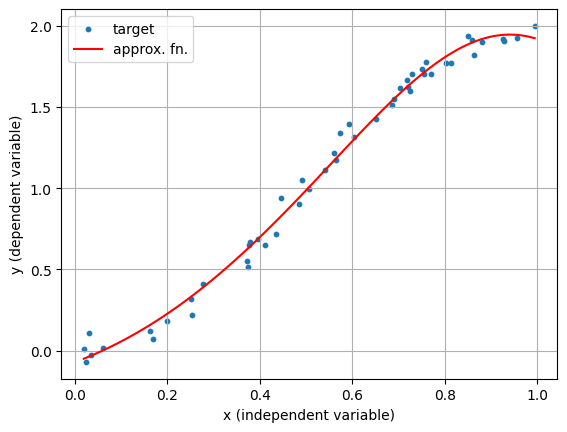

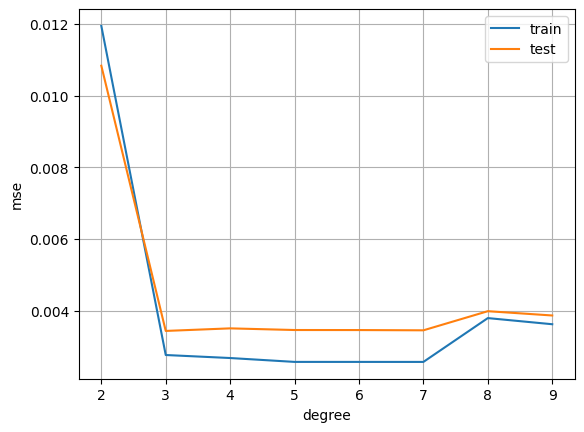

parameter: 0.1


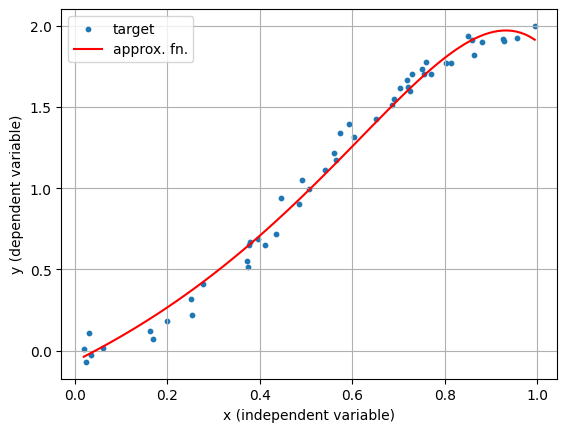

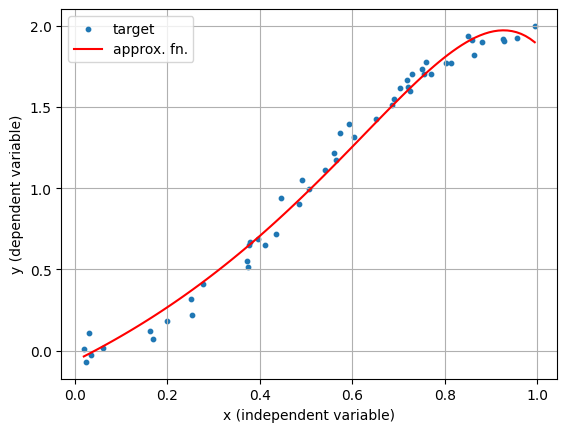

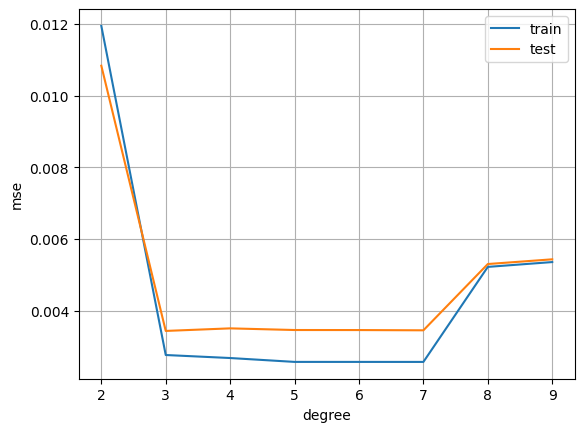

parameter: 1.0


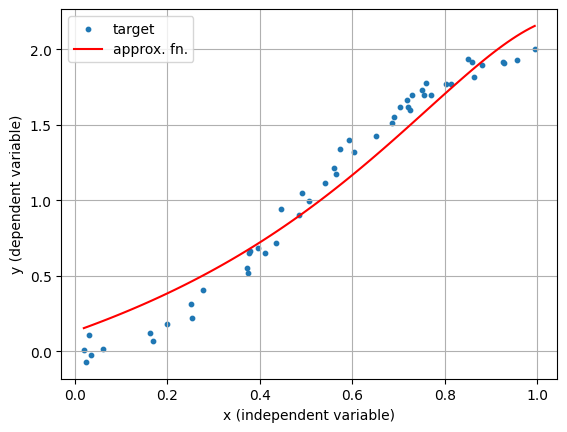

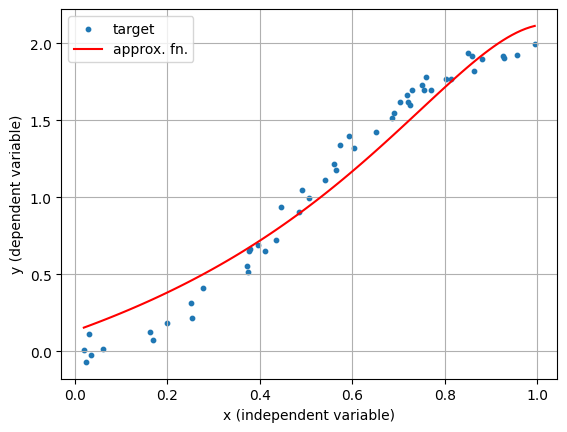

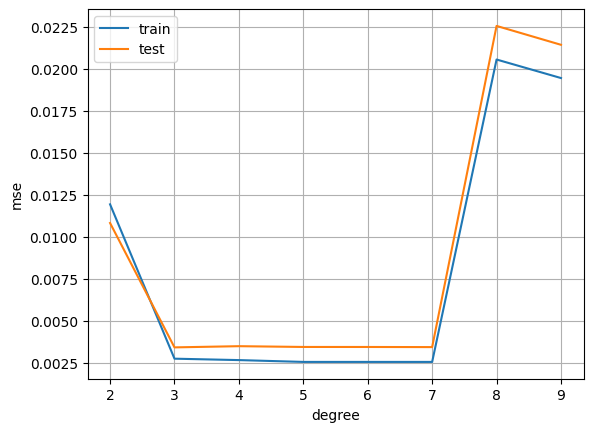

In [14]:
plot_regularized(train_50, [8,9])

degree: 2


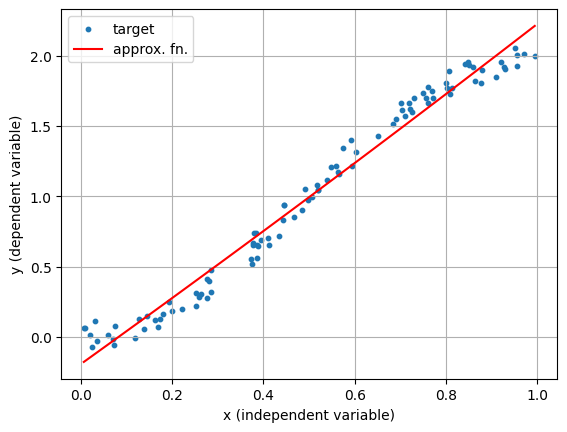

degree: 3


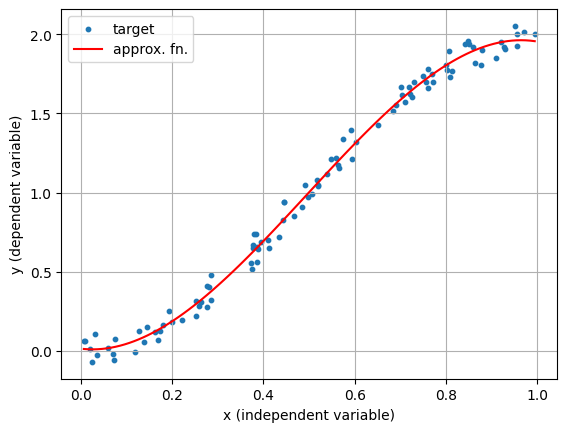

degree: 4


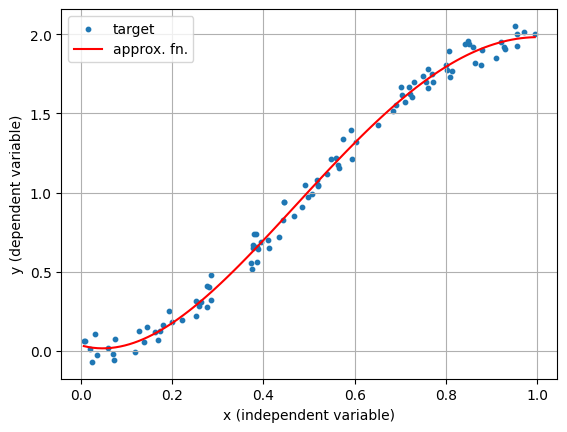

degree: 5


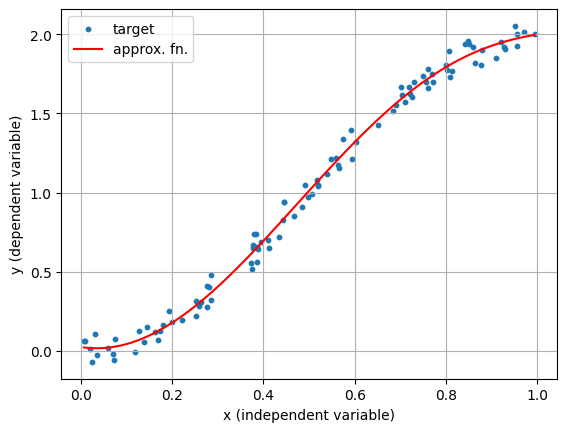

degree: 6


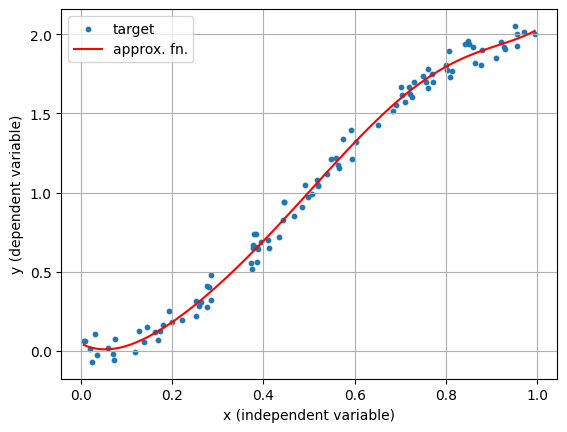

degree: 7


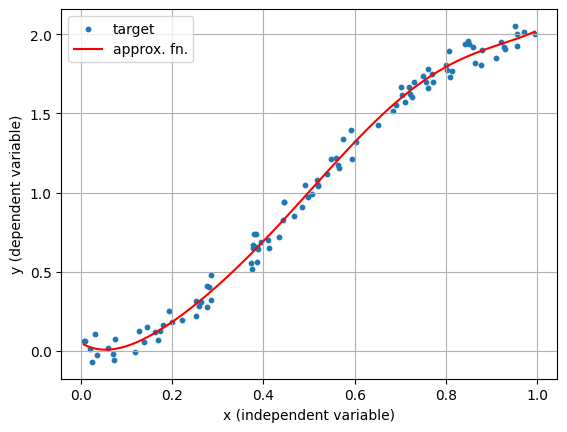

degree: 8


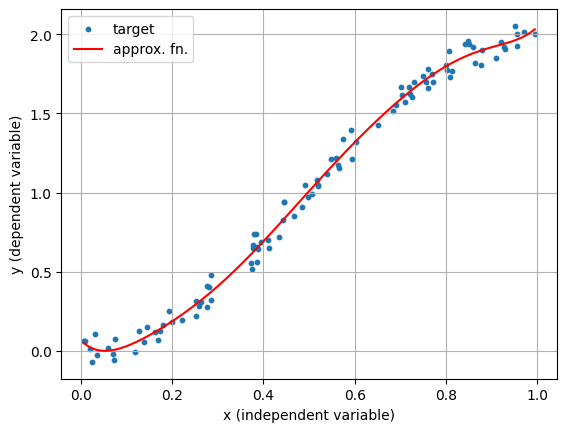

degree: 9


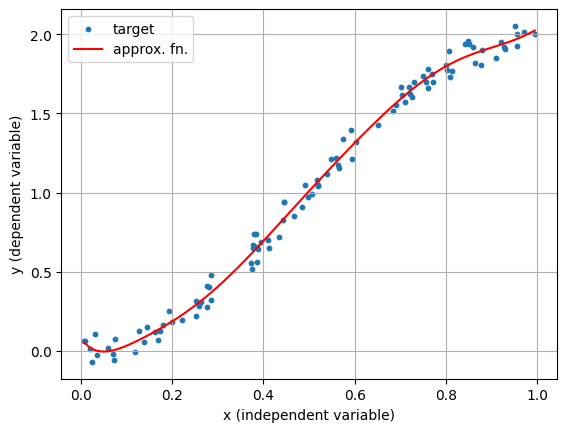

degree: 2, w: [-0.19171741  2.32569242  0.09003152]
train mse: 0.011, test mse: 0.0108

degree: 3, w: [ 0.01417099 -0.34140043  6.98340938 -4.70266281]
train mse: 0.00323, test mse: 0.00324

degree: 4, w: [ 0.03510941 -0.81118408  9.13988897 -8.08343911  1.70088968]
train mse: 0.00316, test mse: 0.00327

degree: 5, w: [ 0.02434829 -0.43045923  6.3569596  -0.48601239 -6.98202371  3.51480963]
train mse: 0.00314, test mse: 0.00326

degree: 6, w: [ 4.54802918e-02 -1.44813740e+00  1.67089874e+01 -4.19745120e+01
  7.08561773e+01 -6.50995492e+01  2.29398914e+01]
train mse: 0.0031, test mse: 0.0033

degree: 7, w: [ 4.97598125e-02 -1.71109759e+00  2.02803292e+01 -6.17766514e+01
  1.25194517e+02 -1.43219523e+02  7.93017242e+01 -1.60962691e+01]
train mse: 0.0031, test mse: 0.00331

degree: 8, w: [ 6.56692736e-02 -2.92370268e+00  4.17722813e+01 -2.20351790e+02
  7.22314092e+02 -1.38949536e+03  1.53779230e+03 -9.11617155e+02
  2.24486925e+02]
train mse: 0.00308, test mse: 0.00332

degree: 9, w: [ 7

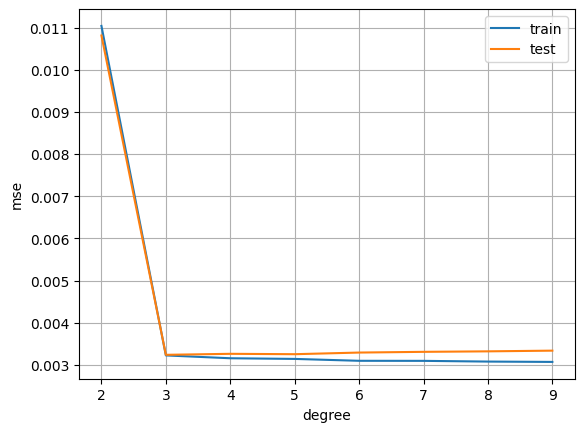

In [15]:
train_100 = pd.read_csv("train_100.csv", header=None)

plot_non_regularized(train_100)

parameter: 1e-07


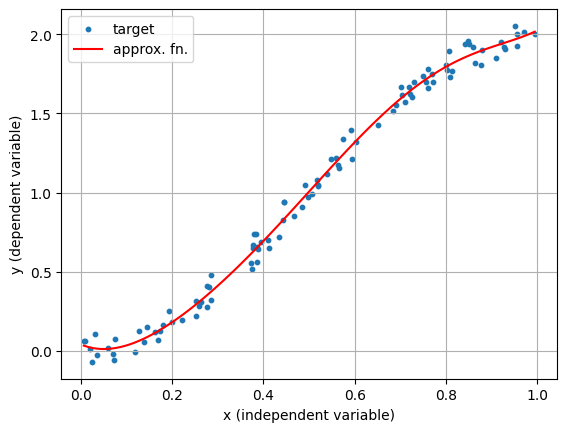

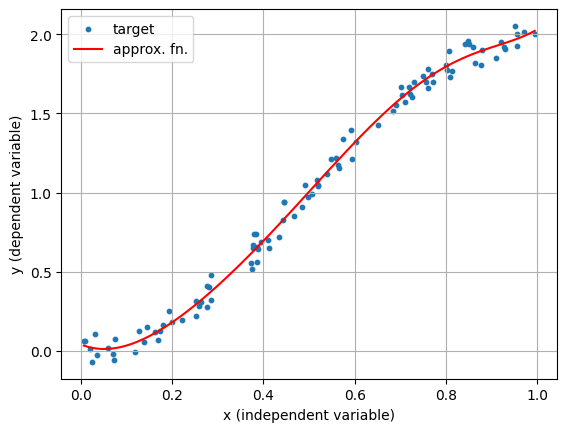

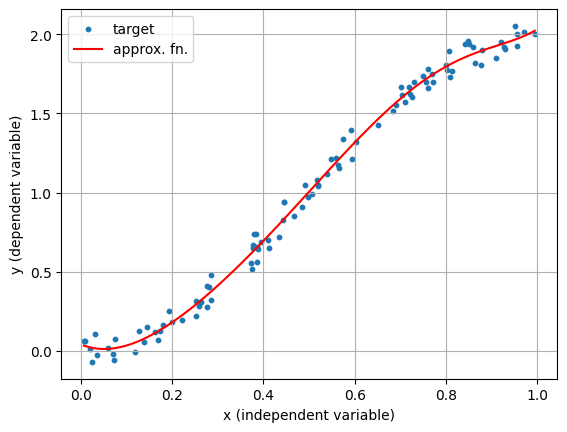

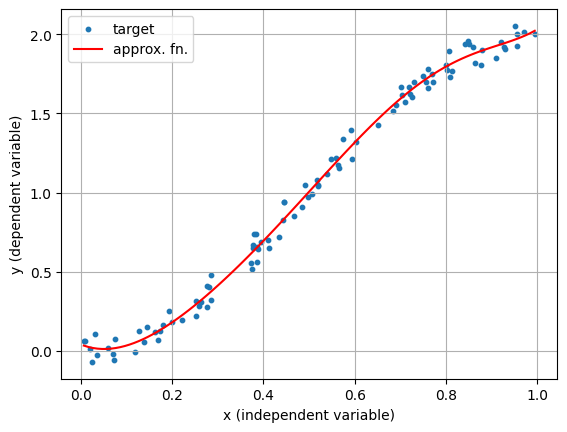

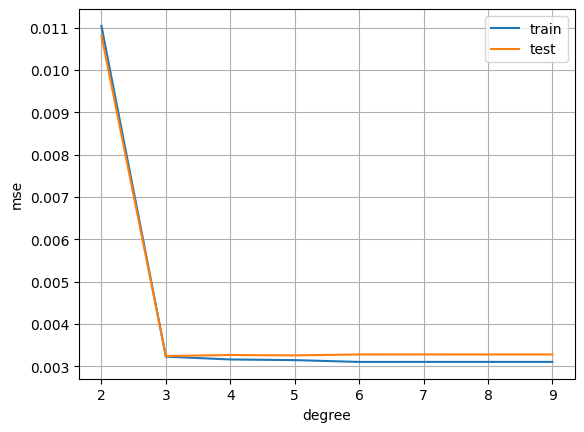

parameter: 1e-06


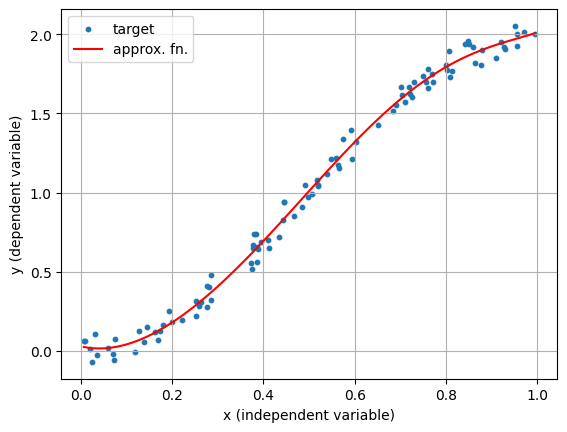

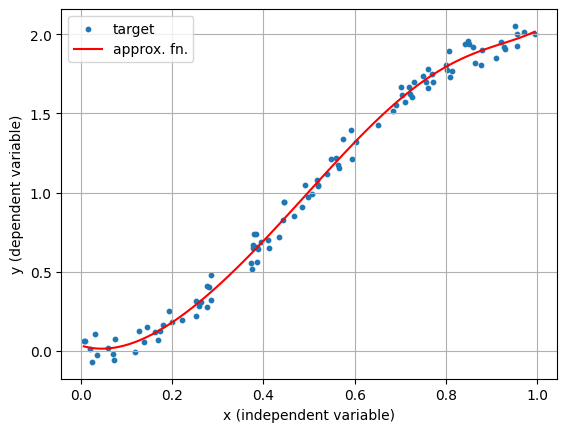

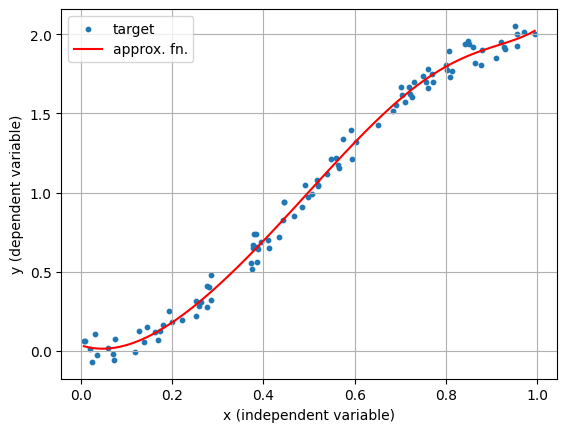

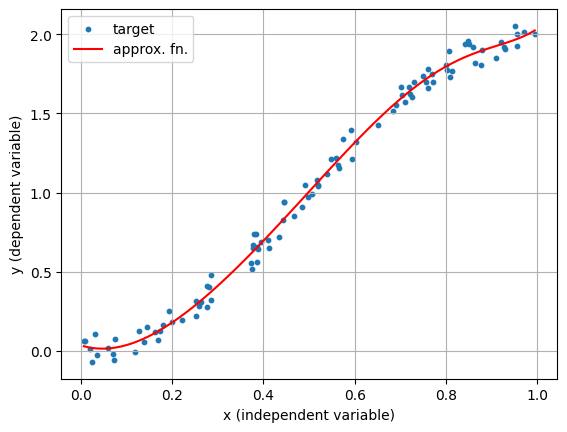

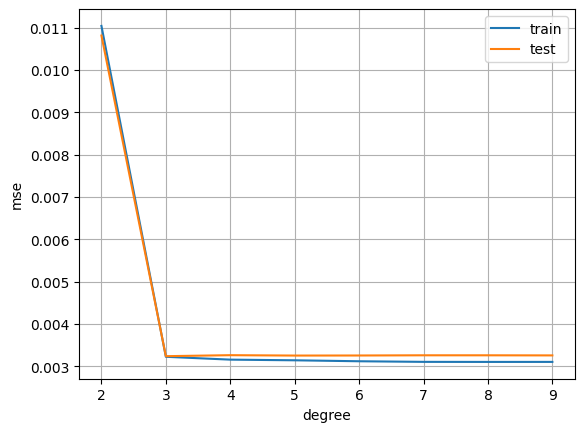

parameter: 1e-05


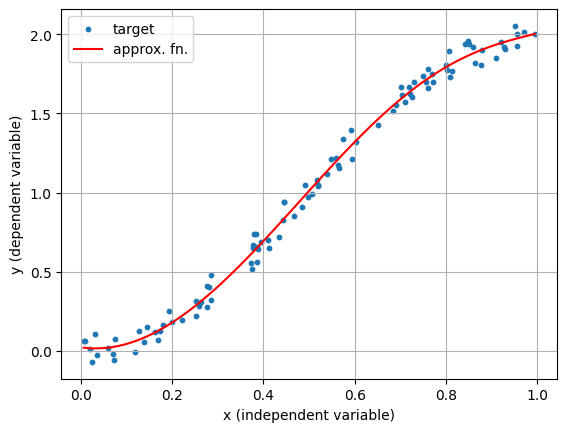

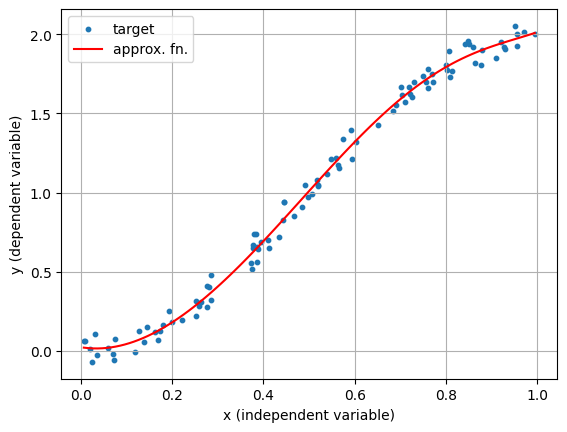

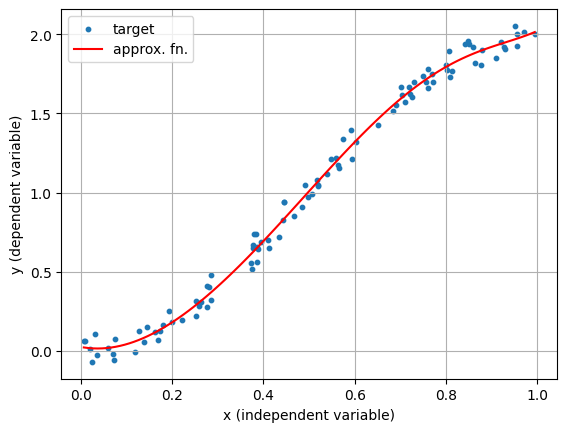

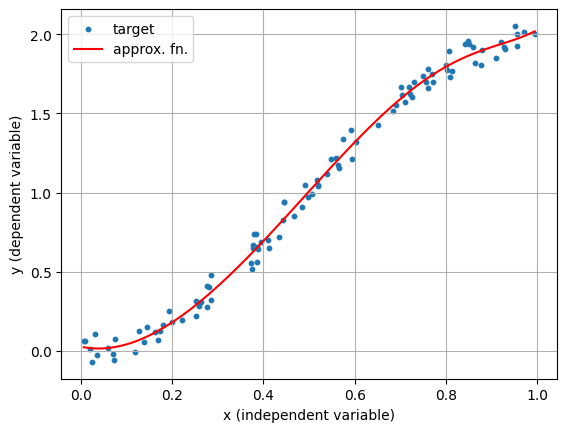

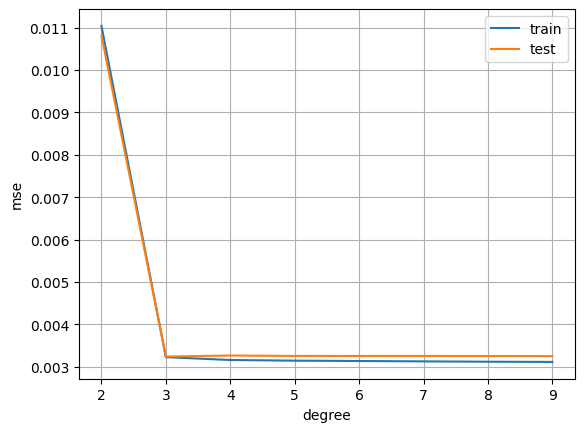

parameter: 0.0001


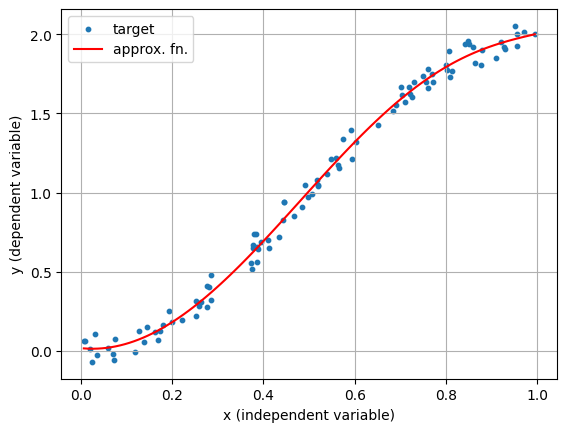

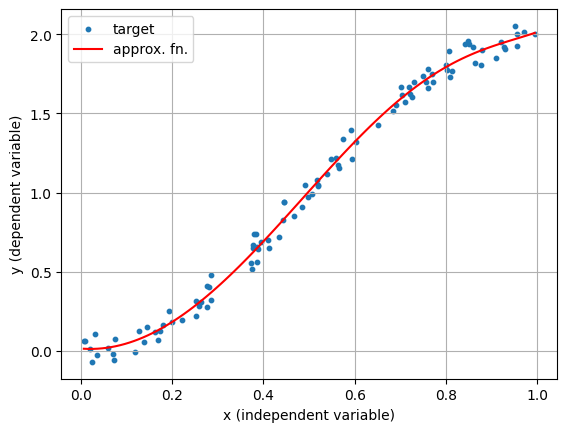

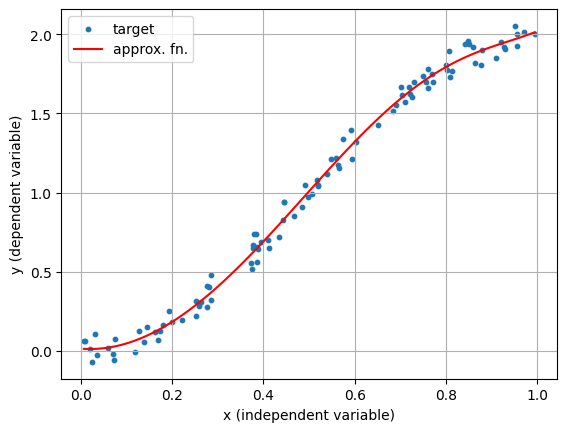

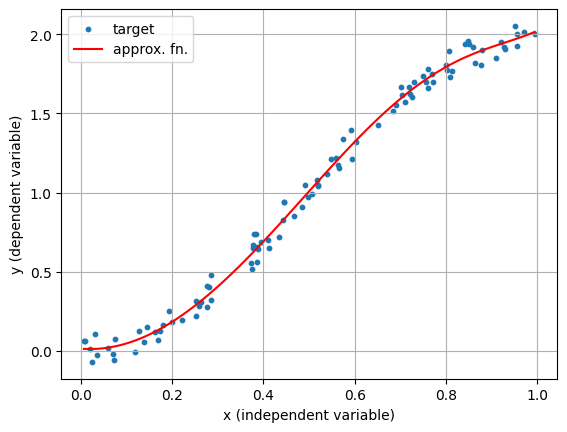

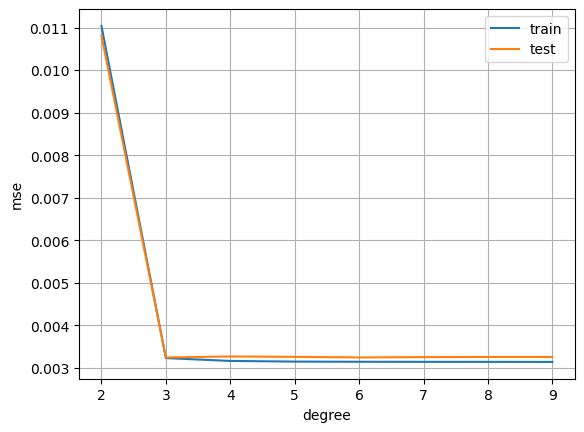

parameter: 0.001


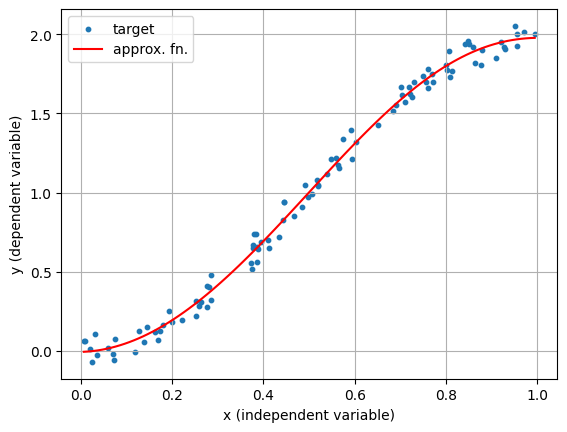

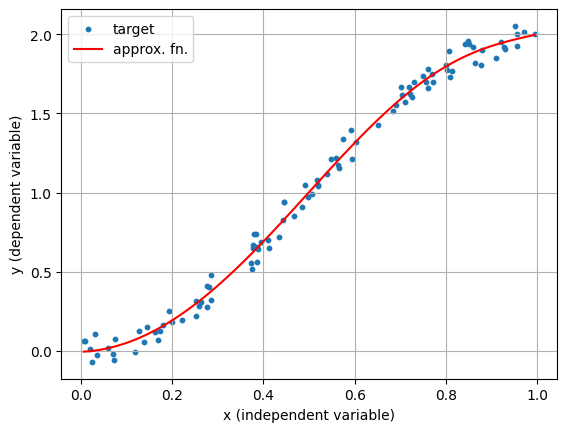

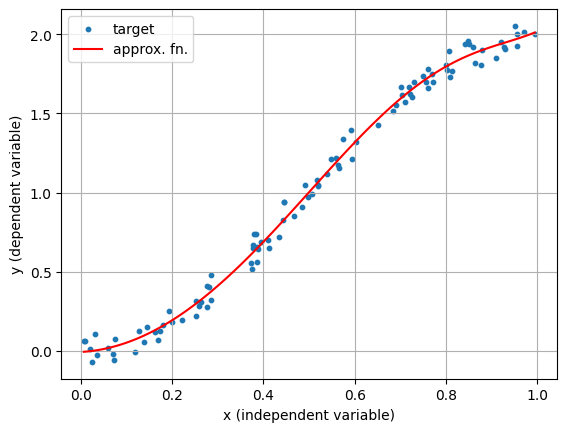

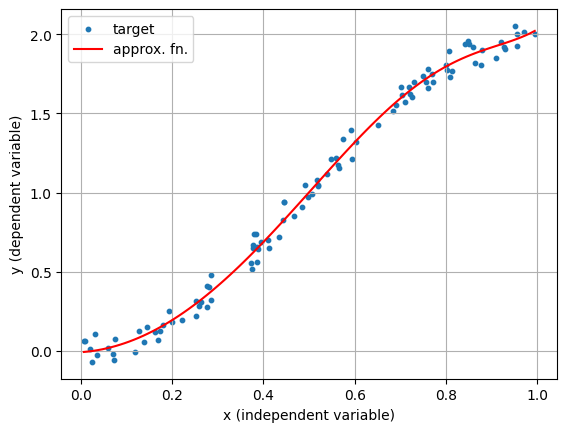

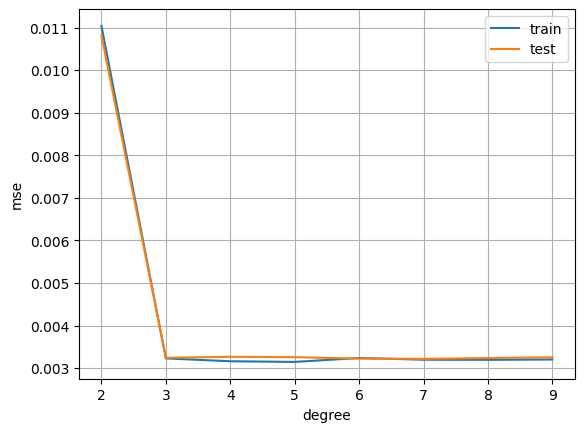

parameter: 0.01


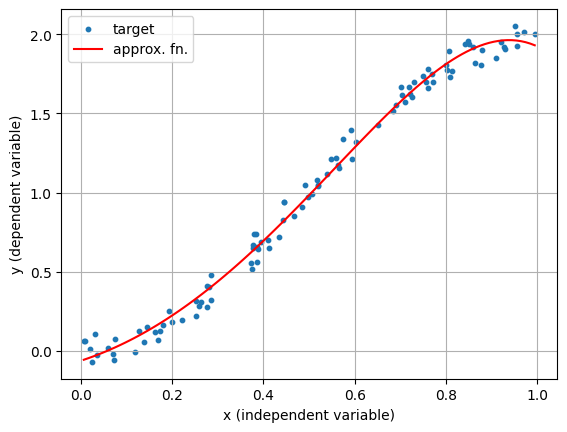

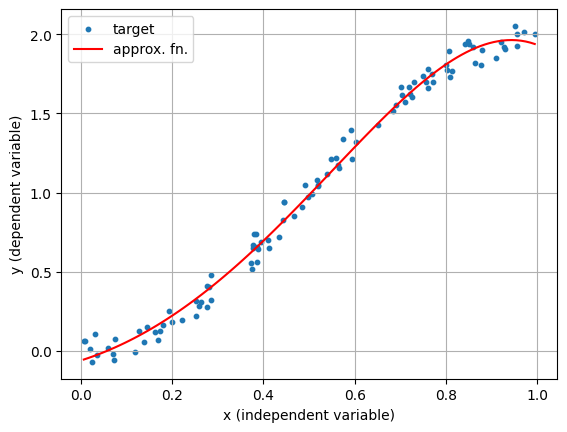

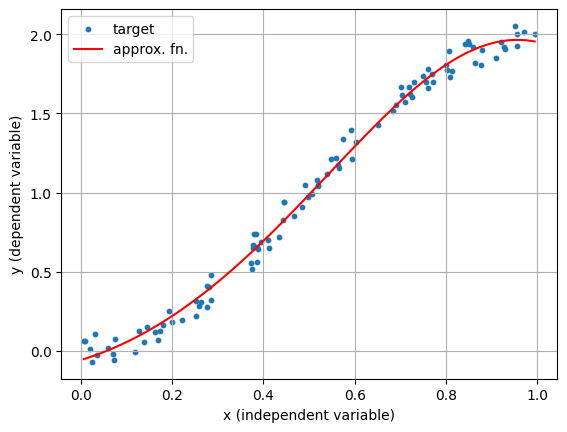

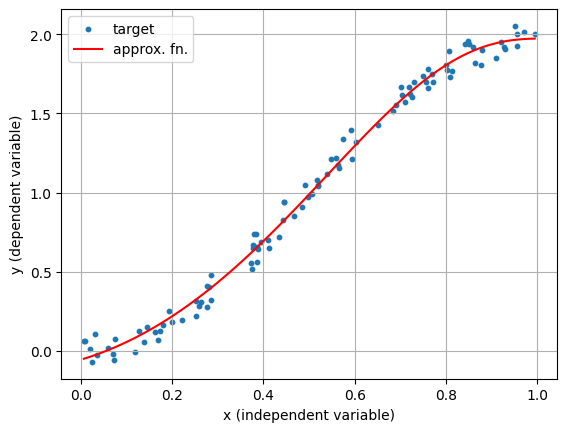

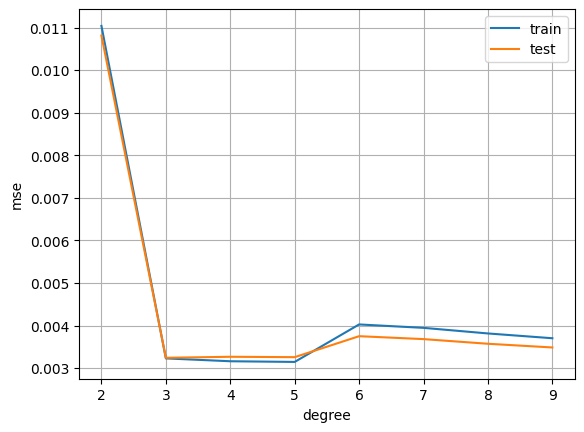

parameter: 0.1


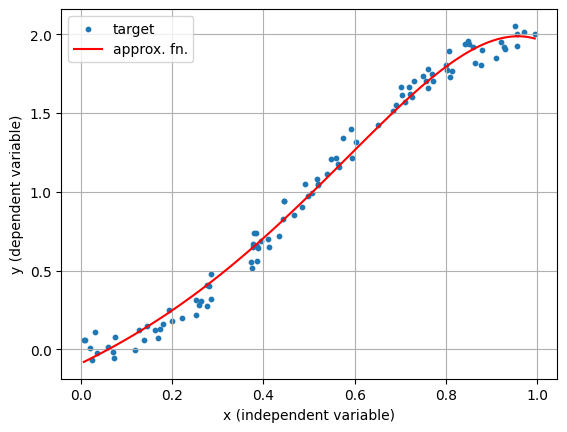

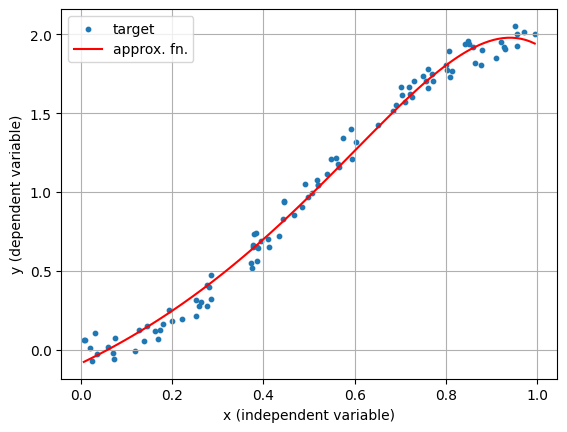

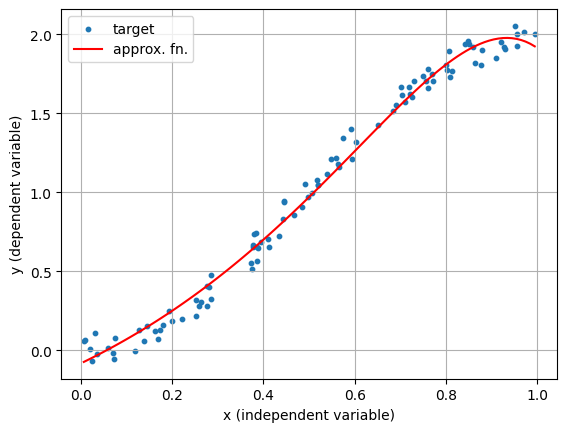

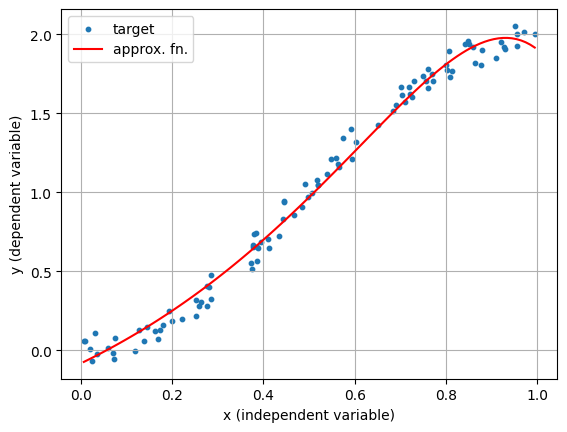

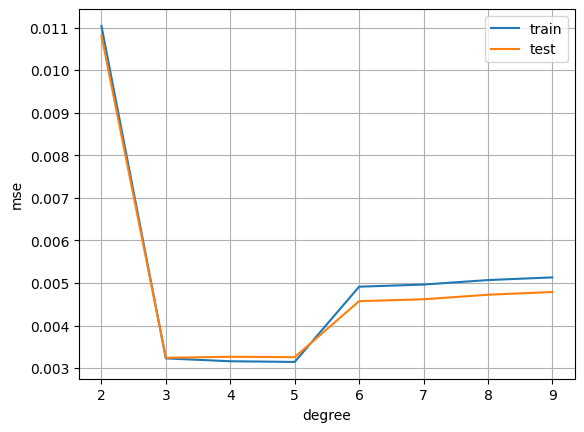

parameter: 1.0


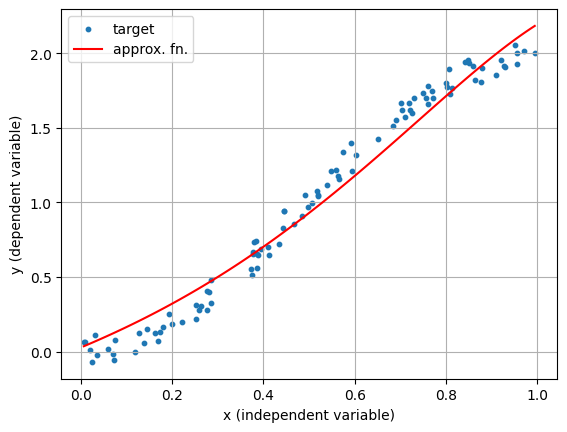

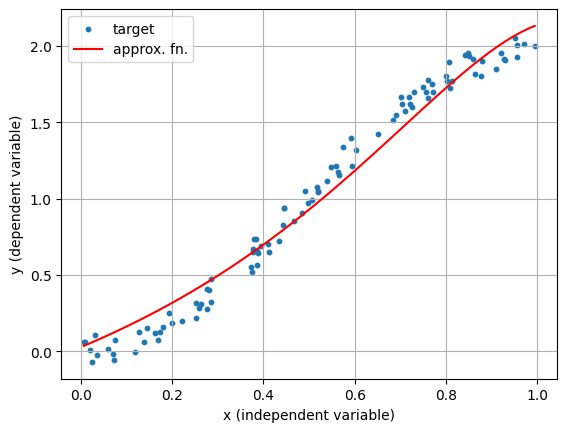

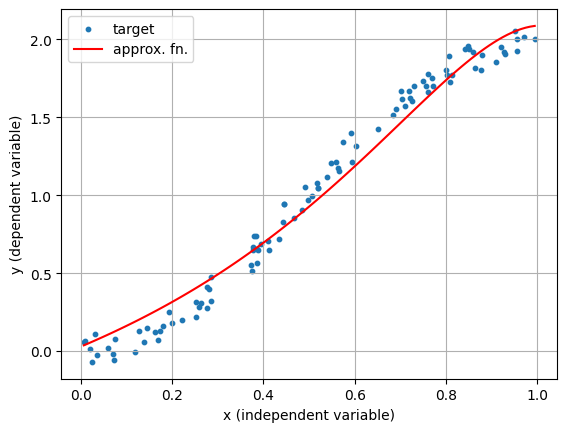

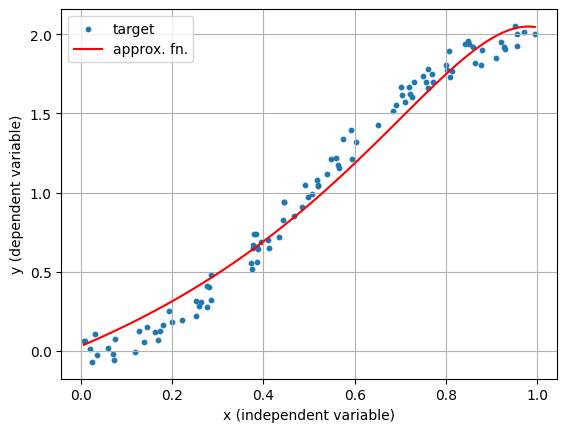

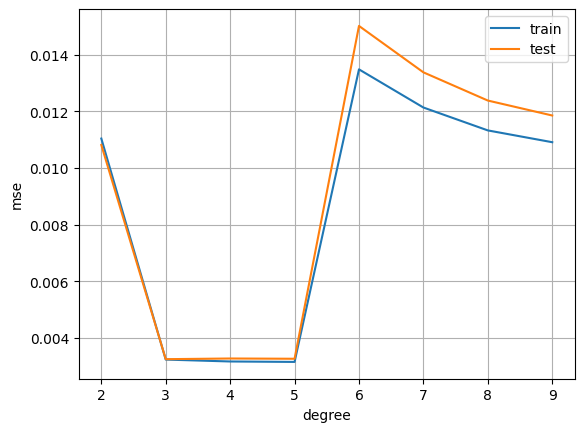

In [16]:
plot_regularized(train_100, [6,7,8,9])

degree: 2


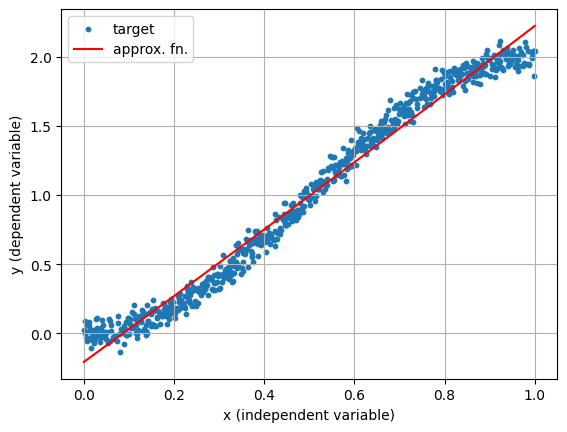

degree: 3


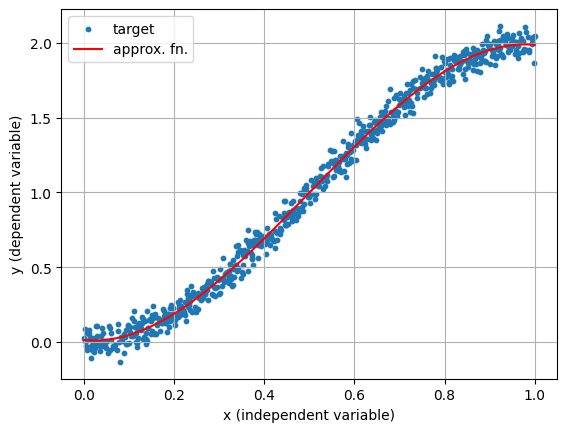

degree: 4


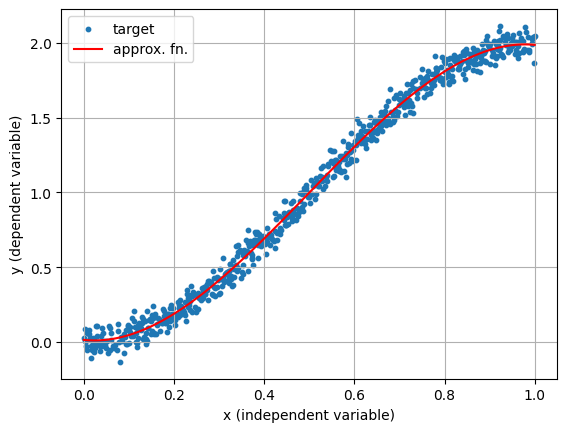

degree: 5


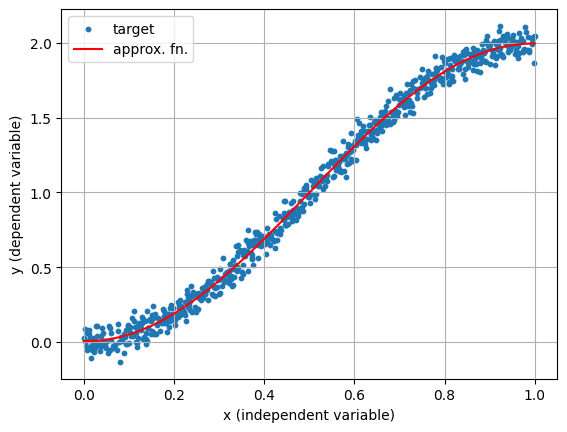

degree: 6


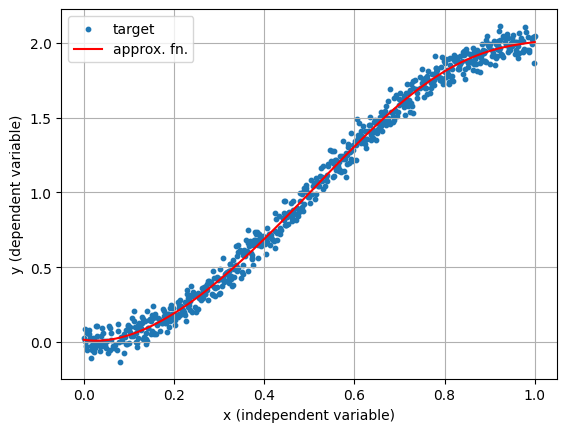

degree: 7


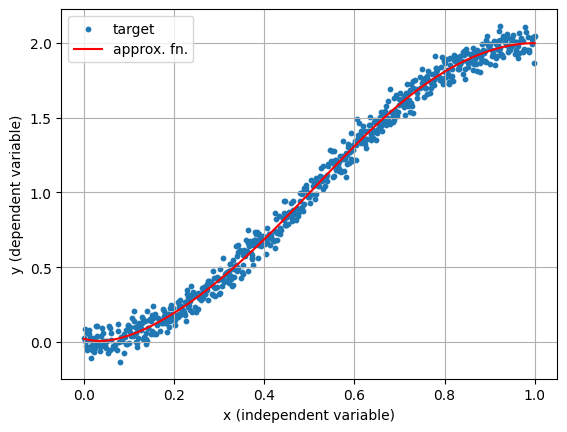

degree: 8


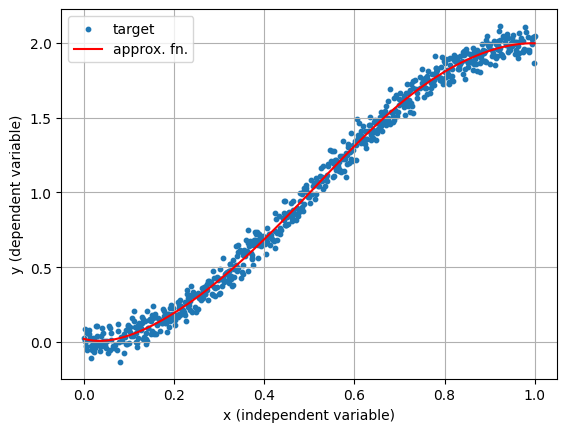

degree: 9


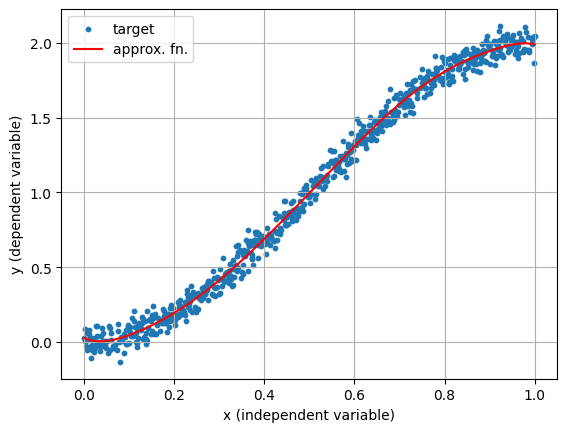

degree: 2, w: [-0.20570279  2.37005704  0.05838192]
train mse: 0.0108, test mse: 0.0107

degree: 3, w: [ 0.01427454 -0.30990252  6.83102879 -4.54908058]
train mse: 0.00321, test mse: 0.00315

degree: 4, w: [ 0.01449375 -0.31449842  6.85205916 -4.58206597  0.01658013]
train mse: 0.00321, test mse: 0.00315

degree: 5, w: [ 0.00707155 -0.07421812  5.13424295  0.04863309 -5.22888321  2.10862715]
train mse: 0.0032, test mse: 0.00314

degree: 6, w: [ 1.53029647e-02 -4.56372439e-01  9.04298241e+00 -1.57222485e+01
  2.44533734e+01 -2.40547907e+01  8.72682931e+00]
train mse: 0.0032, test mse: 0.00315

degree: 7, w: [ 2.22200323e-02 -8.78755897e-01  1.47931922e+01 -4.76492737e+01
  1.12099597e+02 -1.50053630e+02  9.95950427e+01 -2.59308506e+01]
train mse: 0.00319, test mse: 0.00317

degree: 8, w: [ 2.14490903e-02 -8.19572549e-01  1.37526068e+01 -4.00197551e+01
  8.35110893e+01 -9.06479182e+01  3.03671847e+01  1.64006484e+01
 -1.05689742e+01]
train mse: 0.00319, test mse: 0.00317

degree: 9, w: [

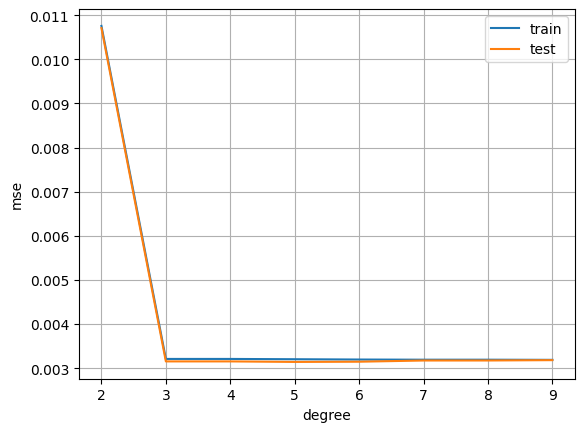

In [17]:
train = pd.read_csv("train.csv", header=None)

plot_non_regularized(train)

parameter: 1e-07


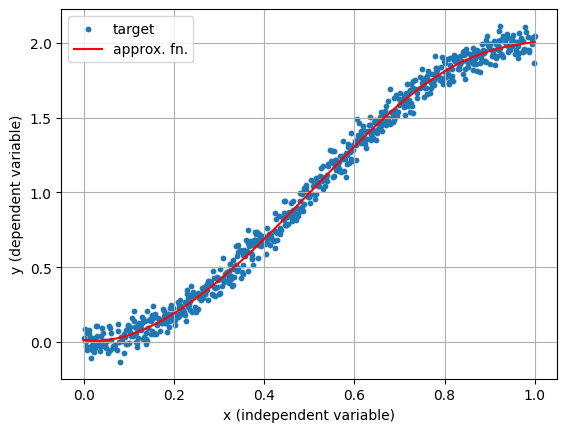

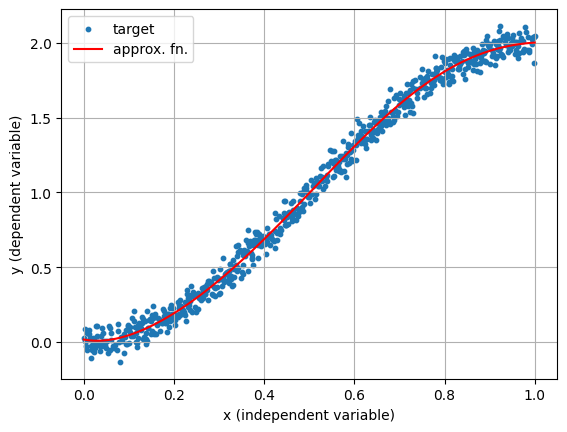

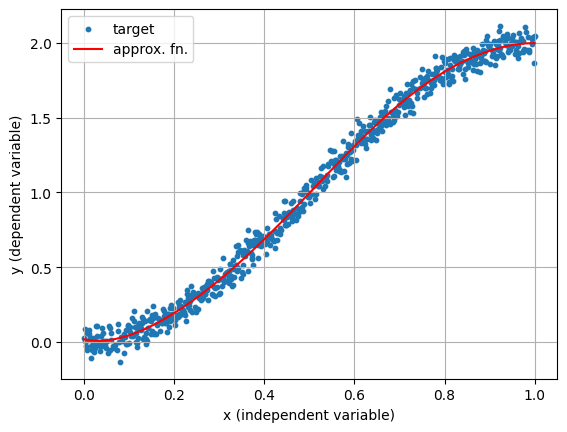

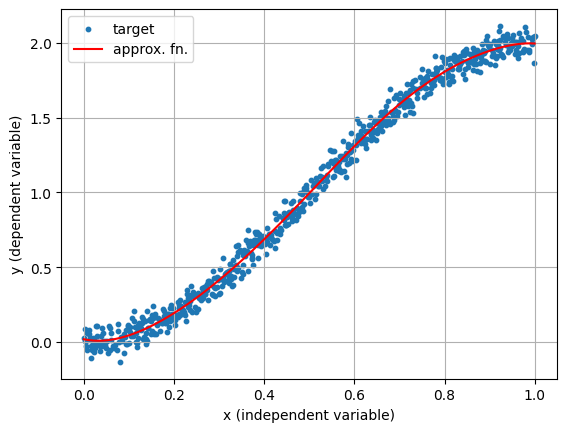

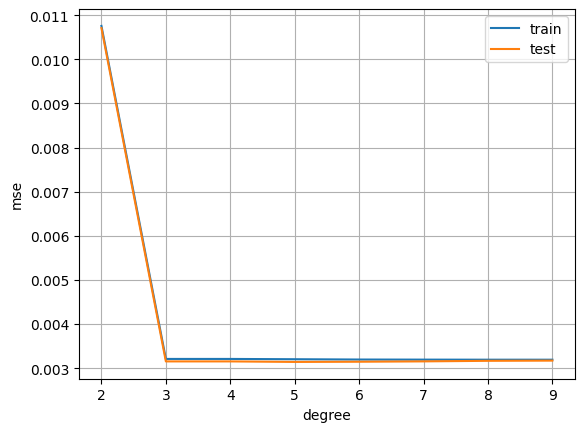

parameter: 1e-06


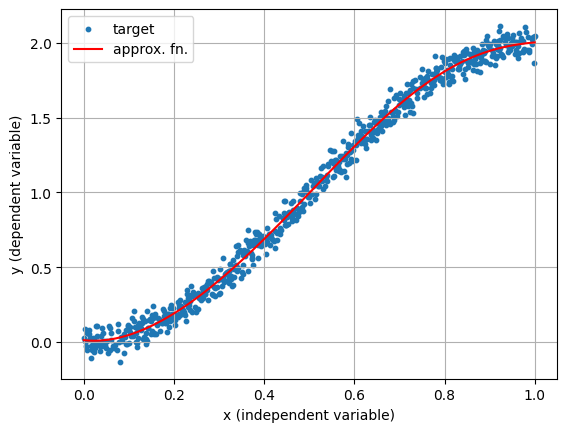

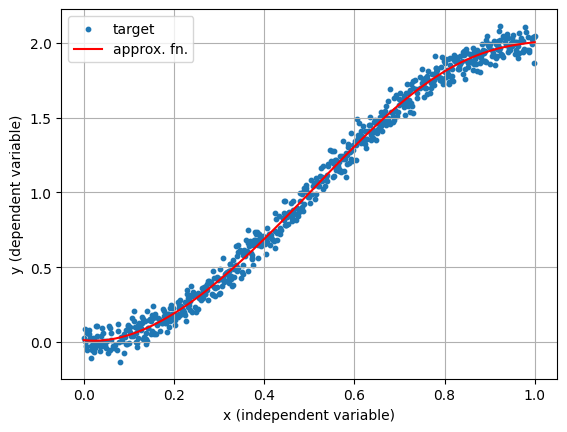

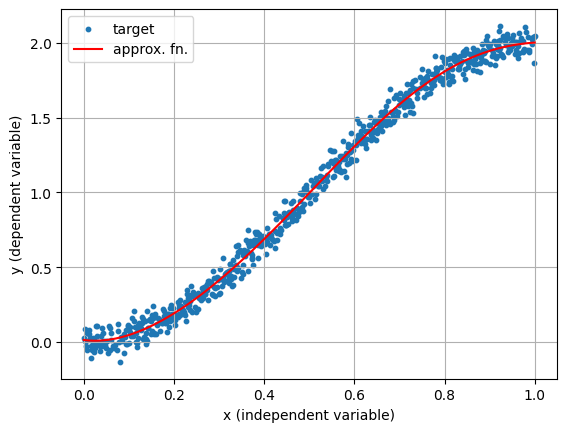

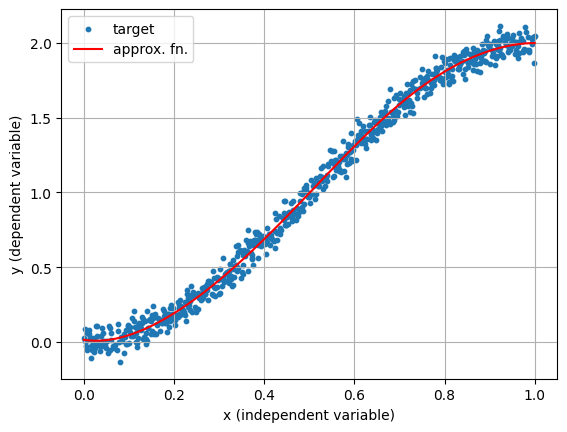

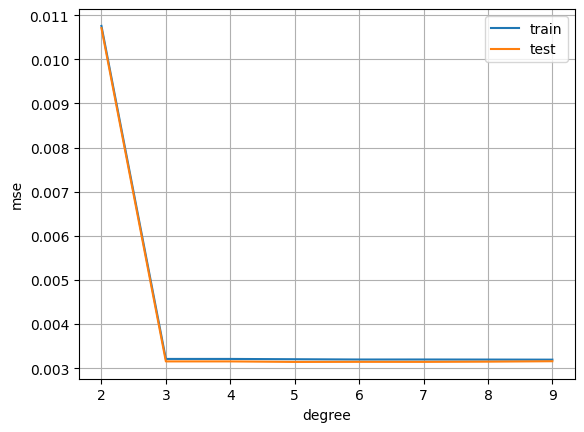

parameter: 1e-05


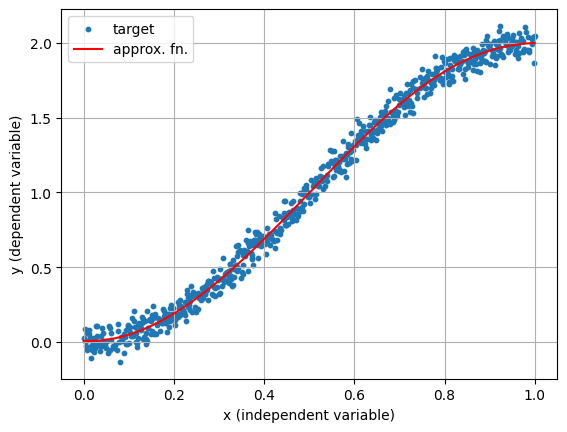

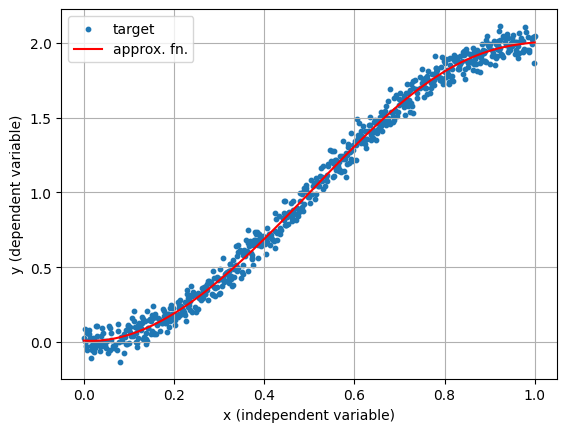

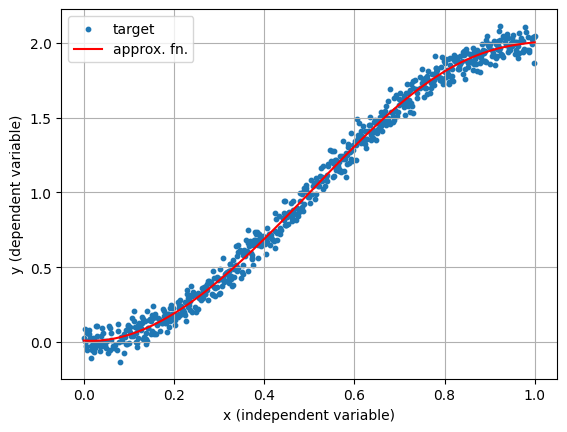

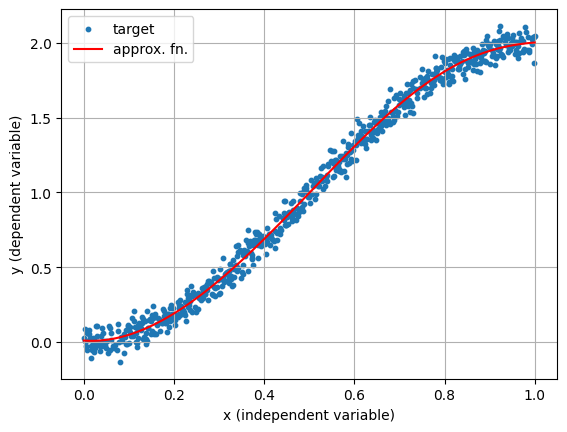

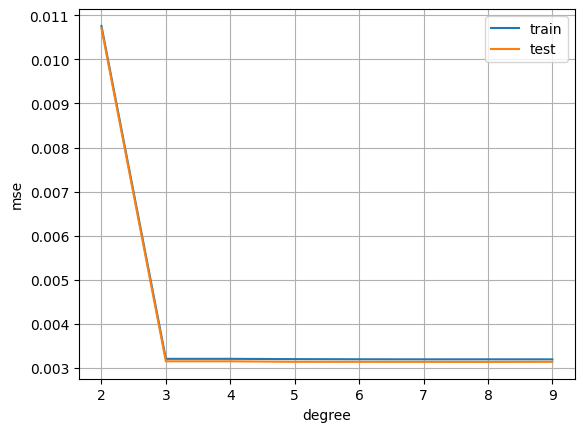

parameter: 0.0001


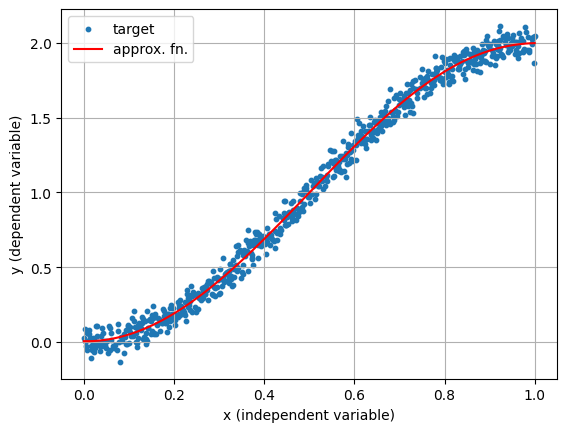

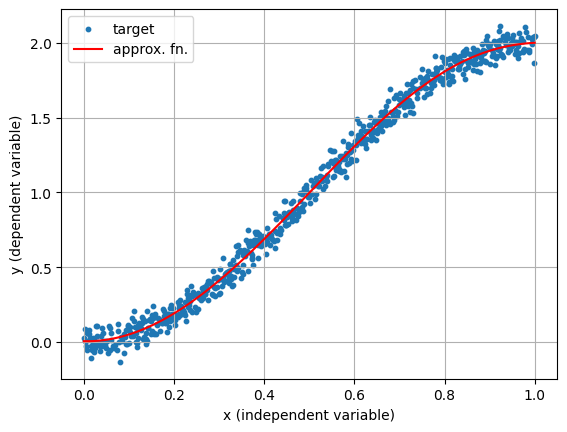

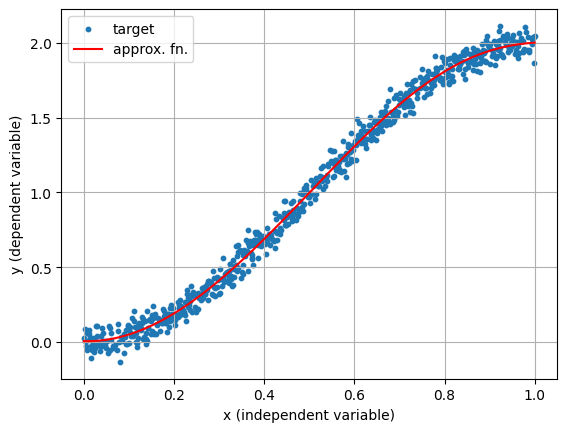

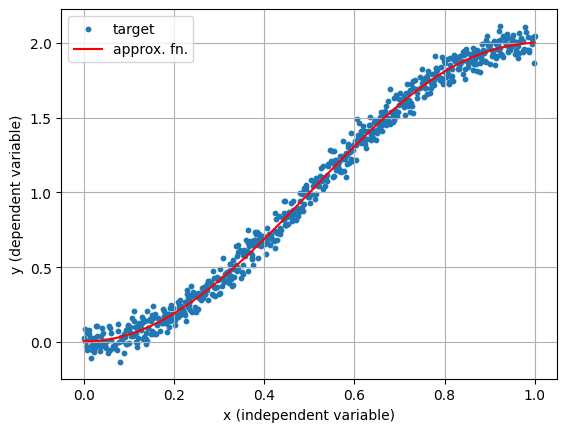

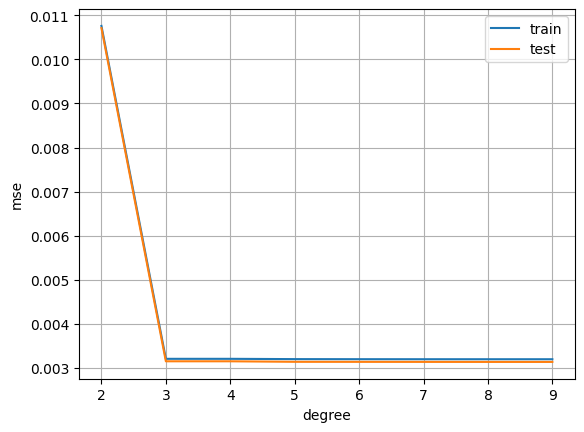

parameter: 0.001


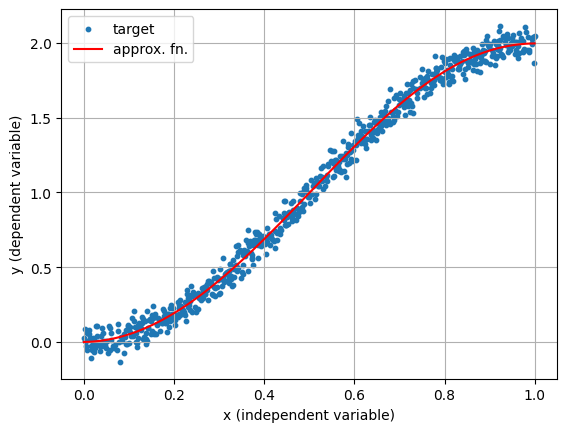

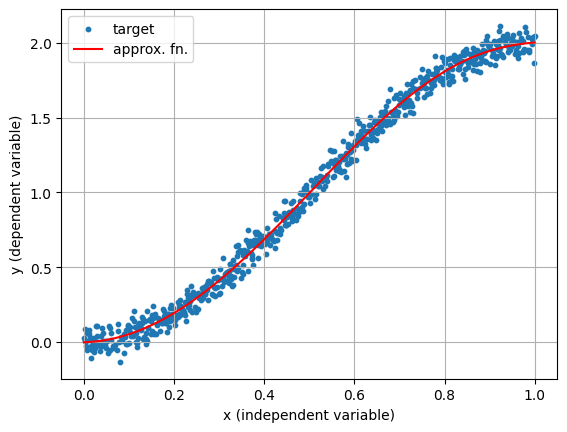

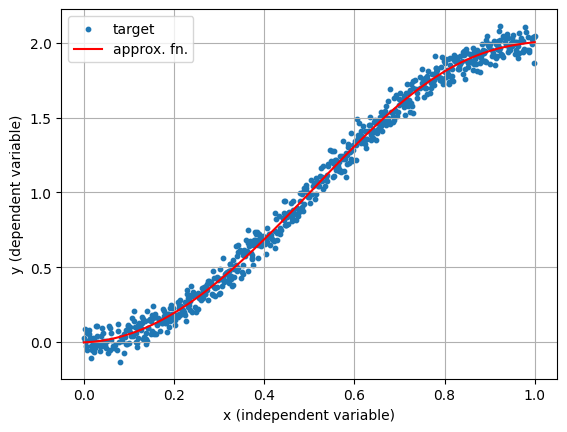

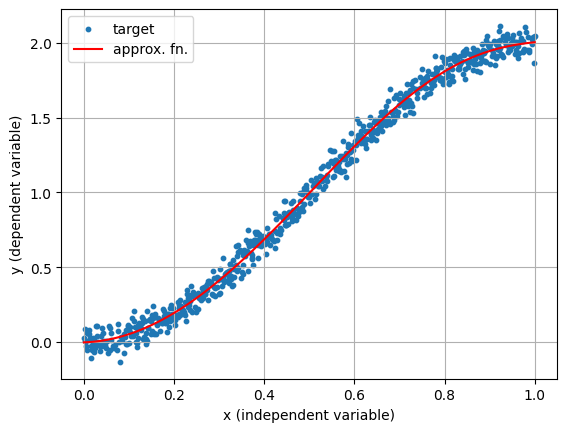

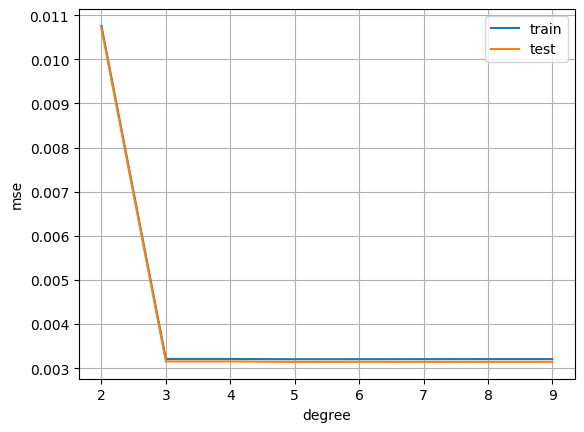

parameter: 0.01


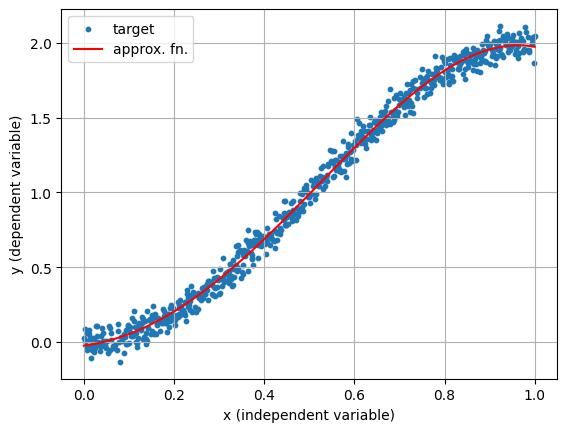

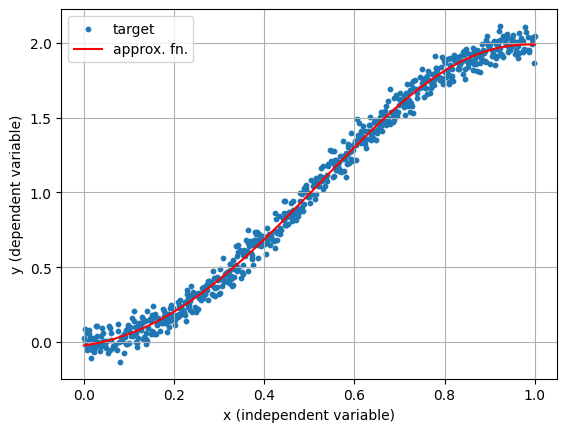

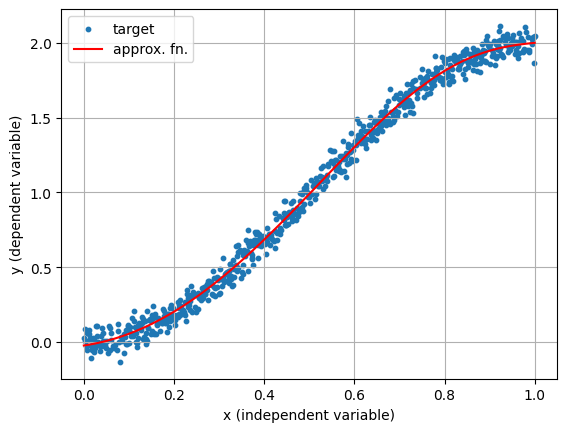

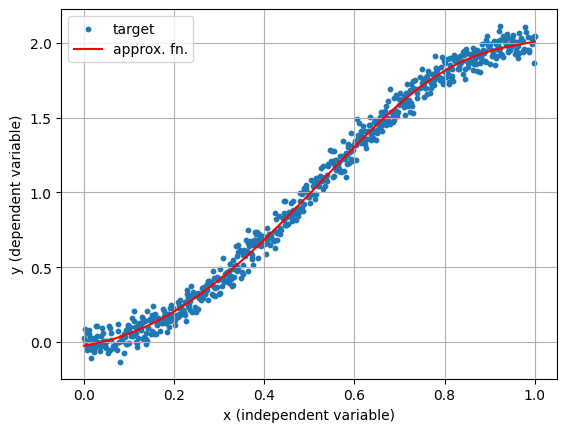

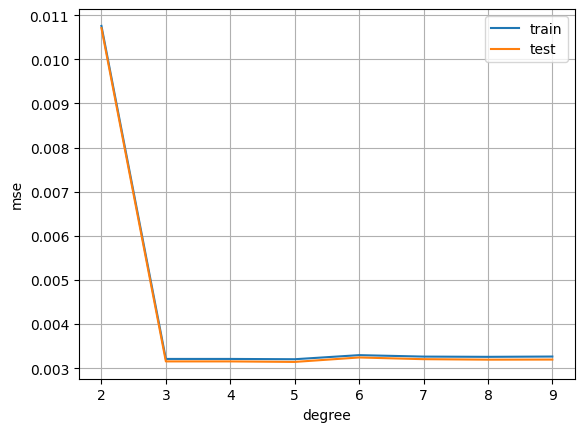

parameter: 0.1


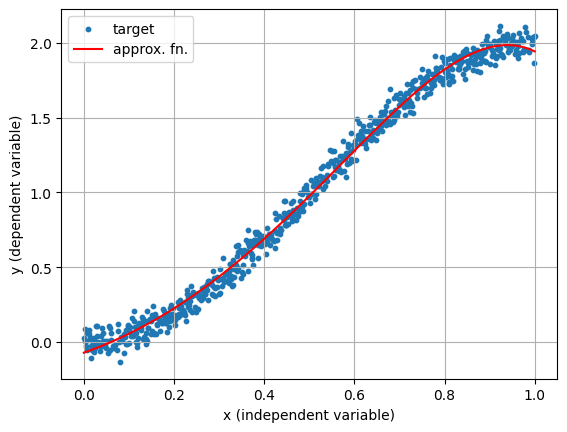

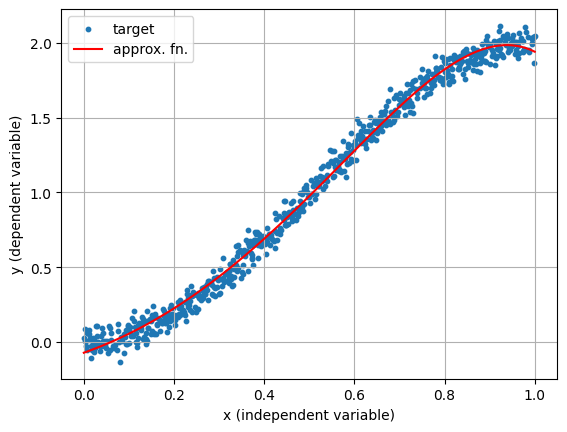

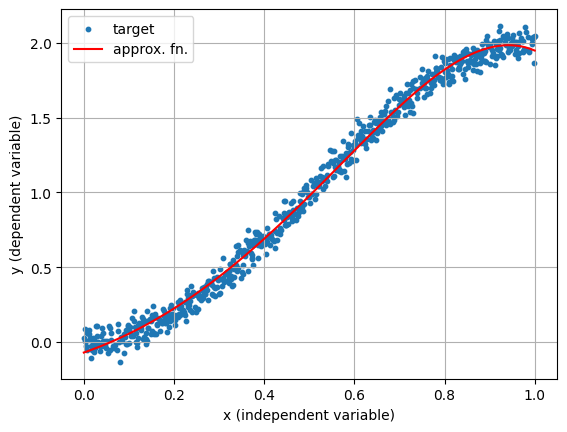

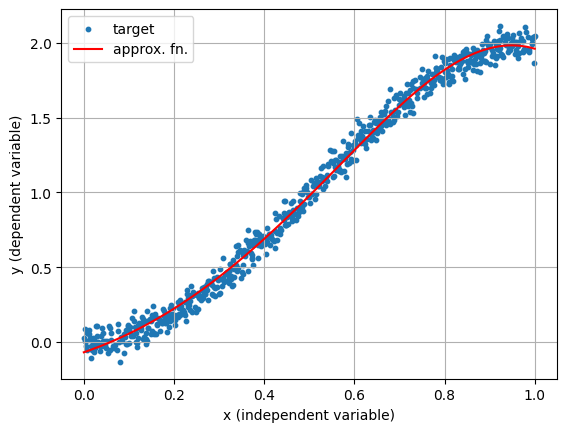

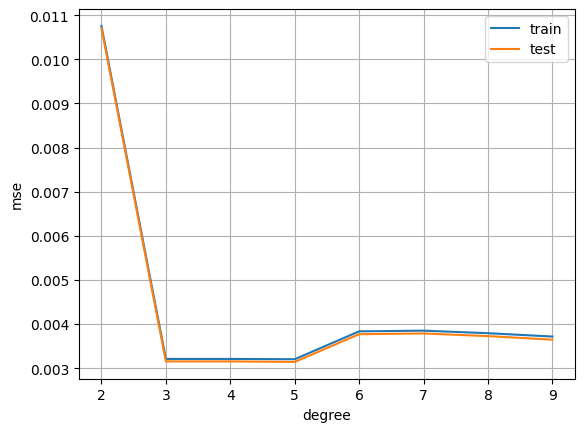

parameter: 1.0


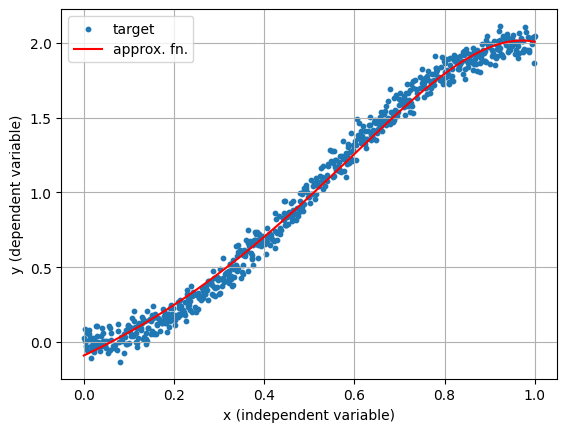

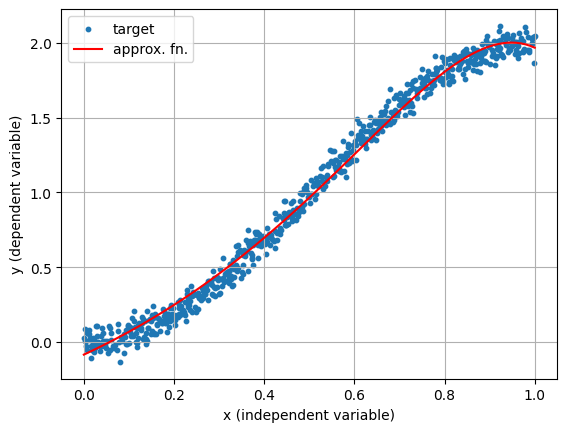

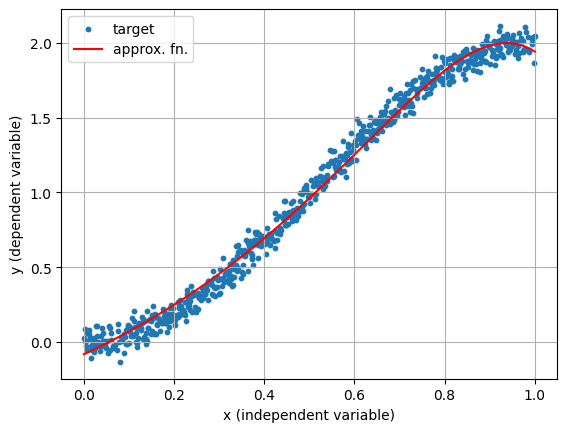

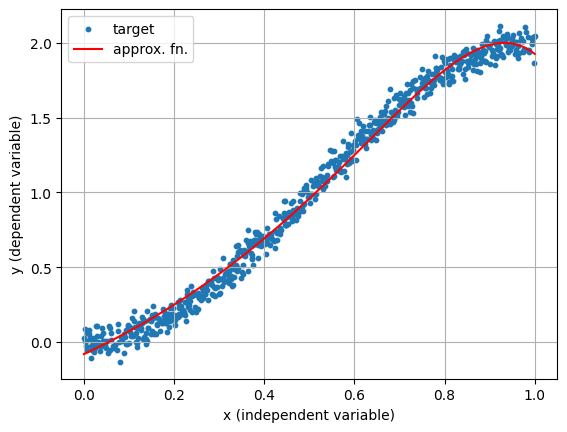

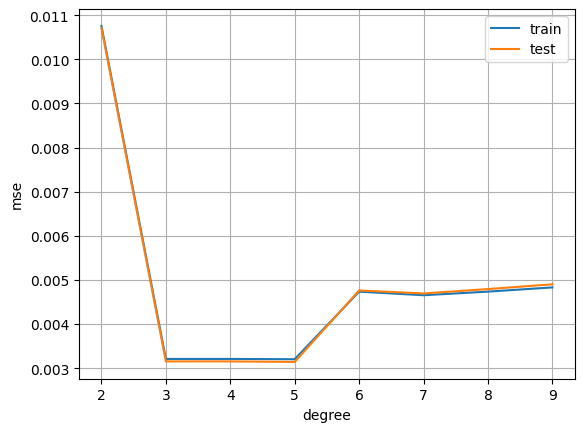

In [18]:
plot_regularized(train, [6,7,8,9])

In [19]:
# result

In [34]:
column_5_values = [row[5] for row in result]
min_value = min(column_5_values)
threshold = 0.0001

# Step 3: Use list comprehension to filter rows
filtered_rows = [row for row in result if abs(row[5] - min_value) <= threshold]

# Convert the result to a NumPy array if needed
filtered_array = np.array(filtered_rows, dtype=object)  # dtype=object preserves any mixed types

sorted_rows = sorted(filtered_rows, key=lambda row: row[5])

print("Sorted rows based on the 5th column:")
print("train_size,degree,reg_para,w,train_mse,test_mse")
for row in sorted_rows:
    strrr = ""
    for col in row[3]:
        strrr += f"{col:.3g}, "
    print(f"{row[0]},{row[1]},{row[2]},\"[{strrr[:-2]}]\",{row[4]:.5e},{row[5]:.5e}")

Sorted rows based on the 5th column:
train_size,degree,reg_para,w,train_mse,test_mse
700,9,0.0001,"[0.00626, -0.0914, 5.57, -2.17, -1.15, -0.385, -0.201, 0.0403, 0.293, 0.0864]",3.20024e-03,3.13938e-03
700,8,0.0001,"[0.00621, -0.0896, 5.56, -2.15, -1.13, -0.409, -0.254, 0.0336, 0.436]",3.20026e-03,3.13957e-03
700,8,1e-05,"[0.0102, -0.225, 6.62, -5.29, 2.49, -0.747, -2.16, 0.572, 0.736]",3.19839e-03,3.13957e-03
700,7,0.0001,"[0.00597, -0.0791, 5.47, -1.95, -1.14, -0.739, -0.405, 0.832]",3.20055e-03,3.14023e-03
700,7,1e-05,"[0.00999, -0.219, 6.6, -5.43, 3.09, -1.23, -3.11, 2.29]",3.19827e-03,3.14030e-03
700,6,0.0001,"[0.00602, -0.0694, 5.33, -1.35, -1.77, -1.49, 1.34]",3.20135e-03,3.14106e-03
700,9,1e-05,"[0.0102, -0.231, 6.71, -5.73, 3.18, -0.532, -3.13, -0.22, 3.04, -1.09]",3.19788e-03,3.14113e-03
700,6,1e-05,"[0.00843, -0.155, 6.07, -4.03, 2.89, -5.36, 2.58]",3.19964e-03,3.14125e-03
700,5,0,"[0.00707, -0.0742, 5.13, 0.0486, -5.23, 2.11]",3.20296e-03,3.14191e-03
700,5,1e-07,"[0.00707, 

In [21]:
def model_target_op(w, data, typ):
    degrees = [2,3,4,5,6,7,8,9]
    ws = [] # weights for different degrees

    x = data[0]
    
    y_target = data[1]
    y_model = f(x, w)
    
    plt.xlabel('x (independent variable)')
    plt.ylabel('y (dependent variable)')
    plt.scatter(x, y_target, s=1, label='target')
    plt.scatter(x, y_model, s=1, label='model')
    plt.grid(True)
    plt.legend()
    plt.savefig(f'plots/best/target_model_{typ}.png', bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close()

    plt.xlabel('target')
    plt.ylabel('model')
    plt.scatter(y_target, y_model, s=1)
    plt.grid(True)
    plt.savefig(f'plots/best/target_model_scatter_{typ}.png', bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close()

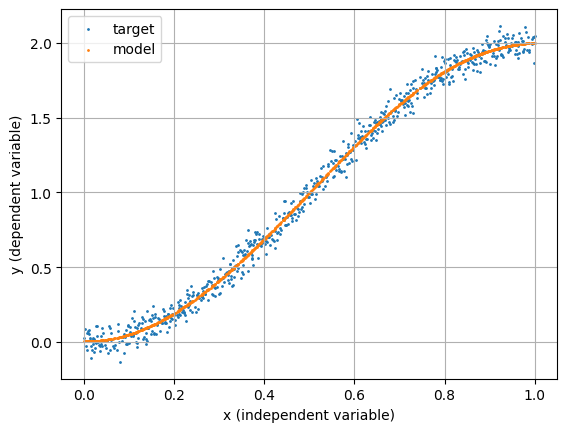

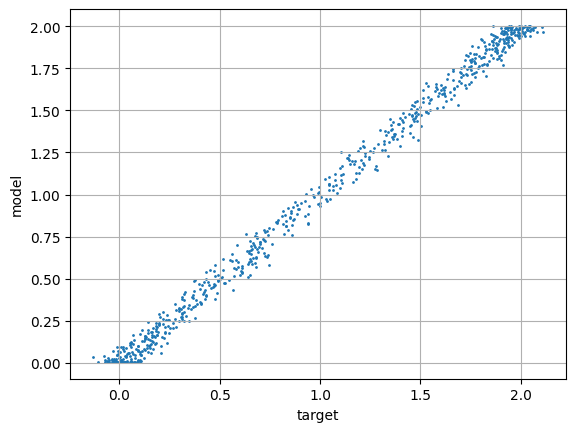

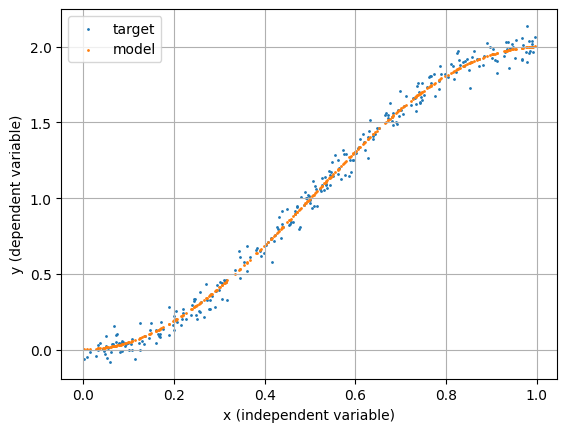

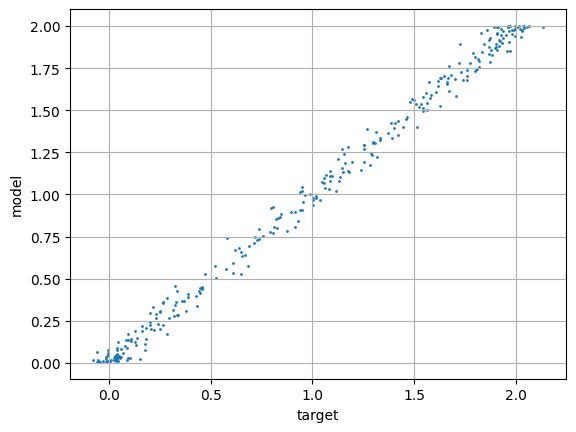

In [22]:
model_target_op(sorted_rows[0][3], train, "train")
model_target_op(sorted_rows[0][3], test, "test")

In [23]:
train_10_filtered_row = [row for row in result if row[0] == 100 and row[2] == 0]
for row in train_10_filtered_row:
    strrr = ""
    for col in row[3]:
        strrr += f"{col:.3g}, "
    strrr = strrr[:-2]
    print(f"{row[1]},\"{strrr}\",{row[4]:.3g},{row[5]:.3g}")

2,"-0.192, 2.33, 0.09",0.011,0.0108
3,"0.0142, -0.341, 6.98, -4.7",0.00323,0.00324
4,"0.0351, -0.811, 9.14, -8.08, 1.7",0.00316,0.00327
5,"0.0243, -0.43, 6.36, -0.486, -6.98, 3.51",0.00314,0.00326
6,"0.0455, -1.45, 16.7, -42, 70.9, -65.1, 22.9",0.0031,0.0033
7,"0.0498, -1.71, 20.3, -61.8, 125, -143, 79.3, -16.1",0.0031,0.00331
8,"0.0657, -2.92, 41.8, -220, 722, -1.39e+03, 1.54e+03, -912, 224",0.00308,0.00332
9,"0.0784, -4.08, 67.3, -457, 1.87e+03, -4.56e+03, 6.79e+03, -6.02e+03, 2.92e+03, -596",0.00307,0.00334


In [24]:
# degree: 2, w: [-0.09  1.99  0.35]
# train mse: 1.17845e-02, test mse: 1.28925e-02

# degree: 3, w: [ 0.02 -0.75  8.18 -5.57]
# train mse: 2.38087e-03, test mse: 4.11705e-03

# degree: 4, w: [ 0.03 -1.19 10.34 -9.08  1.81]
# train mse: 2.35016e-03, test mse: 4.14055e-03

# degree: 5, w: [  0.08  -3.26  25.27 -49.65  48.72 -19.4 ]
# train mse: 2.30289e-03, test mse: 6.26804e-03

# degree: 6, w: [-1.44e-01  7.09e+00 -7.85e+01  3.84e+02 -8.23e+02  8.16e+02 -3.05e+02]
# train mse: 1.96896e-03, test mse: 8.53963e-02

# degree: 7, w: [-2.91e-01  1.60e+01 -2.38e+02  1.50e+03 -4.64e+03  7.51e+03 -6.12e+03
#   1.98e+03]
# train mse: 1.48214e-03, test mse: 7.46246e-01

# degree: 8, w: [-4.56e-01  2.97e+01 -5.92e+02  4.73e+03 -1.88e+04  4.13e+04 -5.11e+04
#   3.32e+04 -8.85e+03]
# train mse: 1.41364e-03, test mse: 8.31662e-01

# degree: 9, w: [-5.01e+00  4.26e+02 -1.15e+04  1.17e+05 -6.06e+05  1.80e+06 -3.21e+06
#   3.40e+06 -1.97e+06  4.83e+05]
# train mse: 5.72474e-04, test mse: 1.55247e+03

In [25]:
train_10_filtered_row = [row for row in result if row[0] == 10 and row[2] != 0 and row[1] in [4,5,6,7,8,9]]
train_10_filtered_row = sorted(train_10_filtered_row, key=lambda row: row[1])
for row in train_10_filtered_row:
    strrr = ""
    for col in row[3]:
        strrr += f"{col:.3g}, "
    strrr = strrr[:-2]
    print(f"{row[1]},{row[2]},\"{strrr}\",{row[4]:.3g},{row[5]:.3g}")

4,1e-07,"0.0285, -1.18, 10.3, -9.02, 1.78",0.00235,0.00414
4,1e-06,"0.0265, -1.1, 9.95, -8.45, 1.49",0.00235,0.00411
4,1e-05,"0.0143, -0.665, 7.82, -5.07, -0.23",0.00239,0.00407
4,0.0001,"-0.0049, -0.0143, 4.82, -0.428, -2.53",0.00254,0.00419
4,0.001,"-0.0286, 0.524, 3.36, 0.521, -2.47",0.00305,0.00381
4,0.01,"-0.0641, 1.42, 1.49, 0.223, -0.981",0.00704,0.00729
4,0.1,"0.0165, 1.37, 0.775, 0.248, -0.112",0.0162,0.0192
4,1.0,"0.241, 0.735, 0.532, 0.372, 0.263",0.0666,0.0664
5,1e-07,"0.05, -2.09, 16.9, -27.1, 22.8, -8.73",0.00232,0.00485
5,1e-06,"0.0258, -1.07, 9.69, -7.72, 0.614, 0.374",0.00235,0.00409
5,1e-05,"0.0154, -0.681, 7.5, -3.17, -3.39, 1.63",0.00237,0.00396
5,0.0001,"-0.00651, 0.0424, 4.63, -0.465, -1.95, -0.421",0.00258,0.00432
5,0.001,"-0.0285, 0.64, 2.67, 0.881, -0.72, -1.62",0.00295,0.0045
5,0.01,"-0.0565, 1.29, 1.49, 0.566, -0.33, -0.974",0.00524,0.00546
5,0.1,"0.0135, 1.35, 0.814, 0.321, -0.0198, -0.238",0.0144,0.0168
5,1.0,"0.242, 0.721, 0.509, 0.347, 0.237, 0.163",0.068

In [26]:
train_50_filtered_row = [row for row in result if row[0] == 700 and row[2] == 0]
for row in train_50_filtered_row:
    strrr = ""
    for col in row[3]:
        strrr += f"{col:.3g}, "
    strrr = strrr[:-2]
    print(f"{row[1]},\"[{strrr}]\",{row[4]:.3g},{row[5]:.3g}")

2,"[-0.206, 2.37, 0.0584]",0.0108,0.0107
3,"[0.0143, -0.31, 6.83, -4.55]",0.00321,0.00315
4,"[0.0145, -0.314, 6.85, -4.58, 0.0166]",0.00321,0.00315
5,"[0.00707, -0.0742, 5.13, 0.0486, -5.23, 2.11]",0.0032,0.00314
6,"[0.0153, -0.456, 9.04, -15.7, 24.5, -24.1, 8.73]",0.0032,0.00315
7,"[0.0222, -0.879, 14.8, -47.6, 112, -150, 99.6, -25.9]",0.00319,0.00317
8,"[0.0214, -0.82, 13.8, -40, 83.5, -90.6, 30.4, 16.4, -10.6]",0.00319,0.00317
9,"[0.0288, -1.51, 29.1, -184, 784, -2.05e+03, 3.3e+03, -3.18e+03, 1.69e+03, -377]",0.00319,0.00318


In [27]:
train_10_filtered_row = [row for row in result if row[0] == 700 and row[2] != 0 and row[1] in [6,7,8,9]]
train_10_filtered_row = sorted(train_10_filtered_row, key=lambda row: row[1])
for row in train_10_filtered_row:
    strrr = ""
    for col in row[3]:
        strrr += f"{col:.3g}, "
    strrr = strrr[:-2]
    print(f"{row[1]},{row[2]},\"{strrr}\",{row[4]:.3g},{row[5]:.3g}")

6,1e-07,"0.015, -0.442, 8.9, -15.2, 23.4, -23.1, 8.43",0.0032,0.00315
6,1e-06,"0.0129, -0.348, 7.97, -11.5, 16.7, -17.3, 6.5",0.0032,0.00314
6,1e-05,"0.00843, -0.155, 6.07, -4.03, 2.89, -5.36, 2.58",0.0032,0.00314
6,0.0001,"0.00602, -0.0694, 5.33, -1.35, -1.77, -1.49, 1.34",0.0032,0.00314
6,0.001,"0.00076, 0.0323, 4.86, -0.525, -2.36, -1.34, 1.34",0.0032,0.00314
6,0.01,"-0.0236, 0.396, 3.78, 0.0222, -1.73, -1.19, 0.718",0.0033,0.00324
6,0.1,"-0.0709, 1.06, 1.99, 0.574, -0.391, -0.688, -0.535",0.00383,0.00377
6,1.0,"-0.0897, 1.42, 1.23, 0.539, -0.0284, -0.413, -0.653",0.00473,0.00476
7,1e-07,"0.0169, -0.569, 10.7, -25.5, 52.6, -66, 39.8, -9.09",0.00319,0.00315
7,1e-06,"0.013, -0.349, 7.88, -10.5, 12.9, -10.7, 0.973, 1.76",0.0032,0.00314
7,1e-05,"0.00999, -0.219, 6.6, -5.43, 3.09, -1.23, -3.11, 2.29",0.0032,0.00314
7,0.0001,"0.00597, -0.0791, 5.47, -1.95, -1.14, -0.739, -0.405, 0.832",0.0032,0.00314
7,0.001,"-0.00124, 0.0804, 4.66, -0.489, -1.82, -1.23, -0.125, 0.924",0.00321,0.00314
7,0

In [28]:
print(f"{1:.2e}")
print(f"{11:.2e}")
print(f"{111:.2e}")
print(f"{1111:.2e}")
print(f"{0.1:.2e}")
print(f"{0.11:.2e}")
print(f"{0.111:.2e}")
print(f"{0.1111:.2e}")

print()

print(f"{1:.3g}")
print(f"{11:.3g}")
print(f"{111:.3g}")
print(f"{1111:.3g}")
print(f"{0.1:.3g}")
print(f"{0.11:.3g}")
print(f"{0.111:.3g}")
print(f"{0.1111:.3g}")
print(f"{0.0111:.3g}")
print(f"{0.00111:.3g}")
print(f"{0.000111:.3g}")
print(f"{0.0000111:.3g}")
print(f"{0.00000111:.3g}")

print()

print(f"{1:.3f}")
print(f"{11:.3f}")
print(f"{111:.3f}")
print(f"{1111:.3f}")
print(f"{0.1:.3f}")
print(f"{0.11:.3f}")
print(f"{0.111:.3f}")
print(f"{0.1111:.3f}")
print(f"{0.0111:.3f}")
print(f"{0.00111:.3f}")
print(f"{0.000111:.3f}")
print(f"{0.0000111:.3f}")
print(f"{0.00000111:.3f}")

1.00e+00
1.10e+01
1.11e+02
1.11e+03
1.00e-01
1.10e-01
1.11e-01
1.11e-01

1
11
111
1.11e+03
0.1
0.11
0.111
0.111
0.0111
0.00111
0.000111
1.11e-05
1.11e-06

1.000
11.000
111.000
1111.000
0.100
0.110
0.111
0.111
0.011
0.001
0.000
0.000
0.000
